In [16]:
import os
import sys
import openpyxl
import pygal
import pyodbc
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics import mosaicplot
from statsmodels.graphics.mosaicplot import mosaic
sns.set(style="ticks", color_codes=True)
from rpy2.robjects.packages import importr
import requests
import time
import xlrd
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [17]:
# conn = pyodbc.connect("Driver={SQL Server};"
#                       "Server=DESKTOP-MS8S2RN;"
#                       "Database=NCSES;"
#                       "Trusted_Connection=yes;"
# )   

# cursor = conn.cursor()
# cursor.execute("SELECT * from dbo.SED1")
# for row in cursor:
#     print(row)  

In [18]:
# Readind data from SQL Server
conn = pyodbc.connect("Driver={SQL Server};"
                      "Server=DESKTOP-MS8S2RN;"
                      "Database=NCSES;"
                      "Trusted_Connection=yes;"
)   

cursor = conn.cursor()

sql_query = pd.read_sql_query('SELECT * from dbo.SED1',conn)
sql_query.head()
# print(sql_query)
# print(type(sql_query))

,S&E Fields,Broad Fields,Detailed Fields,2018,2017,2016,2015,2014,2013,2012,...,1967,1966,1965,1964,1963,1962,1961,1960,1959,1958
0,Science and engineering,Total,Total,42227.0,41294.0,41234.0,41178.0,40633.0,39031.0,37846.0,...,13274.0,11732.0,10706.0,9462.0,8422.0,7612.0,6872.0,6388.0,6043.0,5751.0
1,Science and engineering,Life sciences,Total,12780.0,12555.0,12536.0,12493.0,12484.0,12207.0,11964.0,...,3143.0,2885.0,2684.0,2361.0,2083.0,1975.0,1783.0,1729.0,1581.0,1622.0
2,Science and engineering,Life sciences,Agricultural sciences and natural resources,1445.0,1494.0,1378.0,1434.0,1338.0,1324.0,1255.0,...,606.0,576.0,576.0,517.0,466.0,470.0,438.0,414.0,342.0,339.0
3,Science and engineering,Life sciences,Biological and biomedical sciences,8801.0,8566.0,8861.0,8783.0,8868.0,8354.0,8322.0,...,2360.0,2135.0,1963.0,1702.0,1510.0,1397.0,1244.0,1246.0,1140.0,1201.0
4,Science and engineering,Life sciences,Health sciences,2534.0,2495.0,2297.0,2276.0,2278.0,2529.0,2387.0,...,177.0,174.0,145.0,142.0,107.0,108.0,101.0,69.0,99.0,82.0


In [19]:
#  Doctorate Recipients by DemographDoctrate reciepients by Citizenship,  Race/Ethnicity, Sex, S&E Fields, Broad Fields, Detailed Fields, and Year
# Data Download from NCSES Interactive Data Tool
df1 = pd.read_csv('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/SED_Export_2020-06-17T23_22_18.852Z.csv', skiprows=[0], header=[1])
df1 = df1.set_index(['S&E Fields', 'Broad Fields', 'Detailed Fields'])
df1.head(3)
#df1.dtypes
#df1.shape

2018  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        42227   
                        Life sciences Total                                        12780   
                                      Agricultural sciences and natural resources   1445   

                                                                                    2017  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        41294   
                        Life sciences Total                                        12555   
                                      Agricultural sciences and natural resources   1494   

                                                                                    2016  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        41234   
                        Life sciences Total                                        12536   
                                      Agricultural sciences and natural resources   1378   

                                                                                    2015  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        41178   
                        Life sciences Total                                        12493   
                                      Agricultural sciences and natural resources   1434   

                                                                                    2014  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        40633   
                        Life sciences Total                                        12484   
                                      Agricultural sciences and natural resources   1338   

                                                                                    2013  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        39031   
                        Life sciences Total                                        12207   
                                      Agricultural sciences and natural resources   1324   

                                                                                    2012  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        37846   
                        Life sciences Total                                        11964   
                                      Agricultural sciences and natural resources   1255   

                                                                                    2011  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        36332   
                        Life sciences Total                                        11535   
                                      Agricultural sciences and natural resources   1206   

                                                                                    2010  \
S&E Fields              Broad Fields  Detailed Fields                                      
Science and engineering Total         Total                                        34997   
                        Life sciences Total                                        11319   
                            

In [20]:
df1s = df1.stack()
df1s =df1s.to_frame()
df1s.head(10)
df1s = df1s.reset_index()
df1s.columns = ['S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']
# df1s.columns
df1s.head()
#df1s.shape

,S&E Fields,Broad Fields,Detailed Fields,Year,Number
0,Science and engineering,Total,Total,2018,42227
1,Science and engineering,Total,Total,2017,41294
2,Science and engineering,Total,Total,2016,41234
3,Science and engineering,Total,Total,2015,41178
4,Science and engineering,Total,Total,2014,40633


In [21]:
df1s = df1s[df1s['Detailed Fields'] != 'Total']
df1s = df1s.reset_index()
df1s = df1s[['S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']]
#df1s["Number"] = df1s["Number"].astype(str).astype(float)
df1s.head(3)
df1s.tail(3)
df1s.shape

(2196, 5)

In [22]:
# Replace no data values '-' to Nan so that it can be dropped
df1s['Number'].replace('-', np.nan, inplace=True)
df1s = df1s.dropna()
#df1s.describe
#df1s.dtypes

# Converting from object to integer
df1s["Number"] = df1s["Number"].astype(str).astype(int)
df1s.dtypes
df1s.head(3)
#df1s.shape

,S&E Fields,Broad Fields,Detailed Fields,Year,Number
0,Science and engineering,Life sciences,Agricultural sciences and natural resources,2018,1445
1,Science and engineering,Life sciences,Agricultural sciences and natural resources,2017,1494
2,Science and engineering,Life sciences,Agricultural sciences and natural resources,2016,1378


Text(0, 0.5, 'Year')

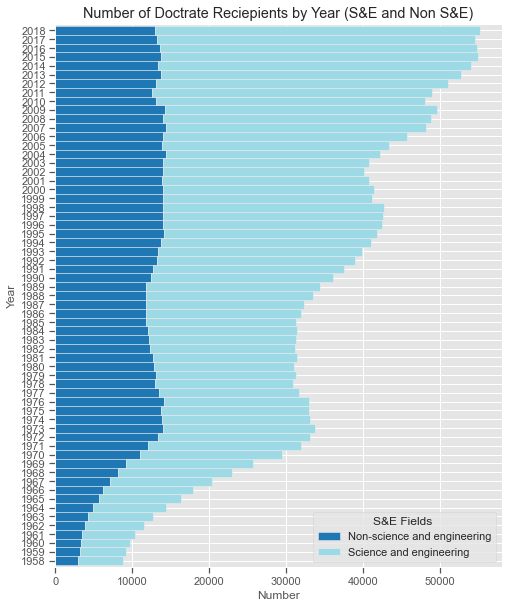

In [23]:
p1 =  df1s.groupby(['S&E Fields', 'Year'])['Number'].sum()
p1 = p1.reset_index()
p1.head(20)
p1=p1.pivot(index='Year', columns='S&E Fields', values='Number')
p1.head(40)
p1.shape
# Adding the stacked=True option to plot() 
# creates a stacked bar plot
p1.plot(kind='barh',colormap='tab20',figsize=(8, 10), width=1.0, stacked=True).legend(
    loc='lower right', ncol=1, title="S&E Fields ")
plt.title("Number of Doctrate Reciepients by Year (S&E and Non S&E)")
plt.xlabel("Number")
plt.ylabel("Year")

Text(0, 0.5, 'Year')

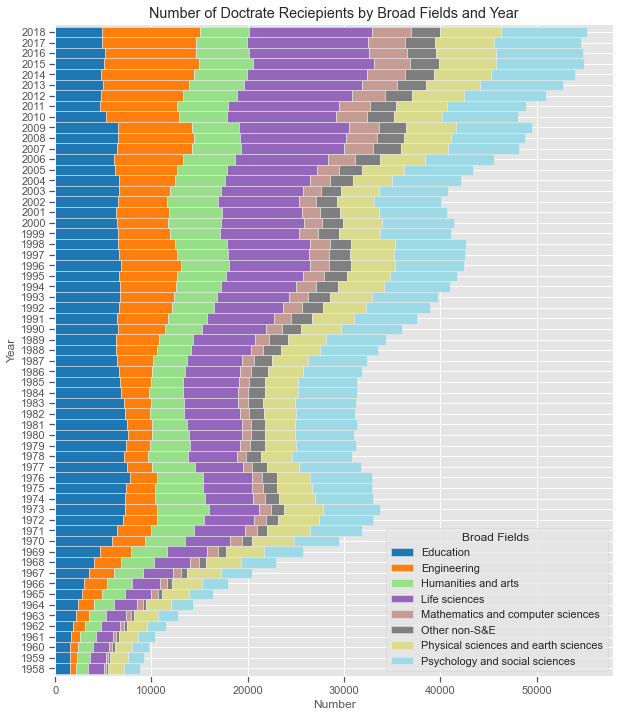

In [24]:
p2 =  df1s.groupby(['Broad Fields', 'Year'])['Number'].sum()
p2 = p2.reset_index()
p2=p2.pivot(index='Year', columns='Broad Fields', values='Number')


# Adding the stacked=True option to plot() 
# creates a stacked bar plot
p2.plot(kind='barh',colormap='tab20',figsize=(10, 12), width=1.0, stacked=True).legend(
    loc='lower right', ncol=1, title="Broad Fields ")
plt.title("Number of Doctrate Reciepients by Broad Fields and Year")
plt.xlabel("Number")
plt.ylabel("Year")

Text(0, 0.5, 'Year')

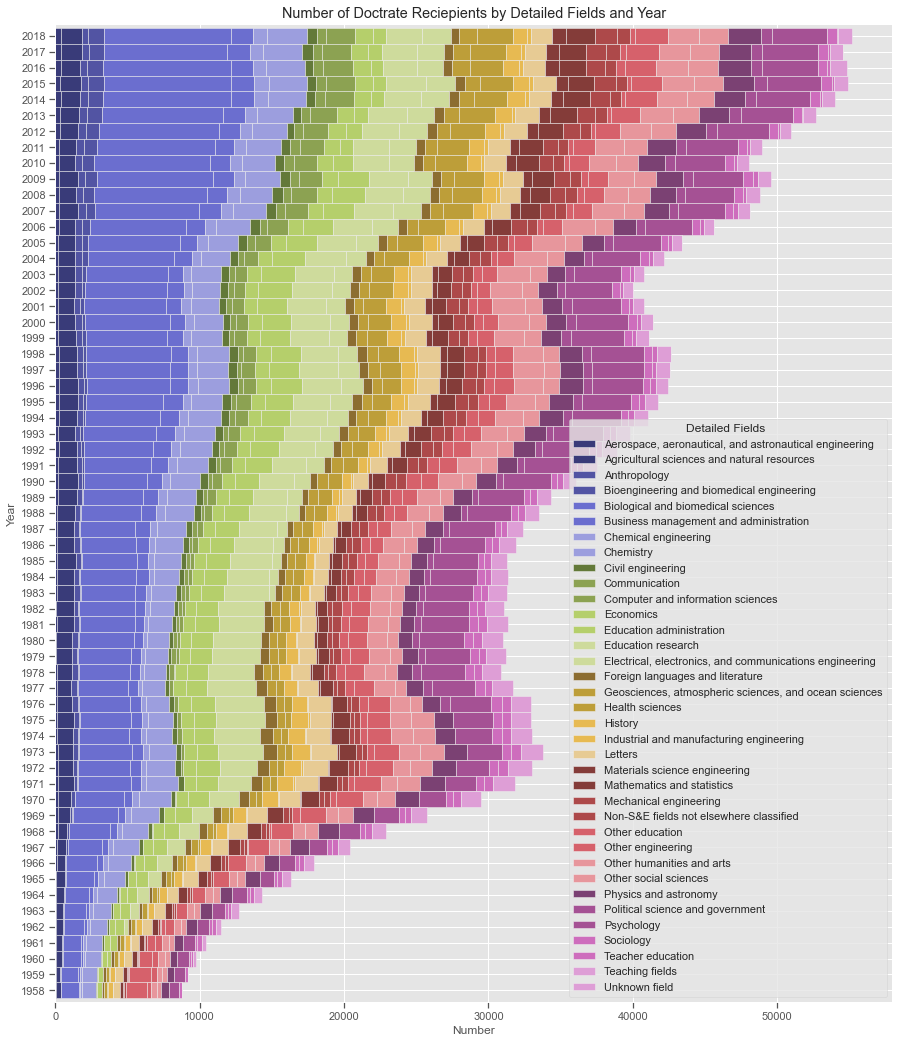

In [25]:
p3 =  df1s.groupby(['Detailed Fields', 'Year'])['Number'].sum()
p3 = p3.reset_index()
p3=p3.pivot(index='Year', columns='Detailed Fields', values='Number')


# Adding the stacked=True option to plot() 
# creates a stacked bar plot
p3.plot(kind='barh',colormap='tab20b',figsize=(15, 18), width=1.0, stacked=True).legend(
    loc='lower right', ncol=1, title="Detailed Fields ")
plt.title("Number of Doctrate Reciepients by Detailed Fields and Year")
plt.xlabel("Number")
plt.ylabel("Year")
#plt.legend(title="Line", loc='upper left', handles=handles[::-1])

In [ ]:
# df1s['S&E Fields'].unique()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAf0AAAJgCAYAAACA3LqIAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+j8jraAAAgAElEQVR4nOzdeVxU5eLH8S+rIKCIiLsYFm64ELlCpJVkaVr3dk1zTVMpU1MT8rqQu4JcFzZR06TUzNSyvHgrDbu4ZJbKr4REEDdUQEE2YRjm+f3BZWScYWRgBs7MfN+vF69ilnOeOaJnOOc8n7EQQggQERGRybNs6AEQERFR/eBOn4iIyExwp09ERGQmuNMnIiIyE9zpExERmQnu9ImIiMwEd/pkMM8//zxee+01yOVylduLiorQuXNn/PLLLwZZb0REBP72t78ZZNk1VVxcjOnTp6NHjx5466231O4/cOAAOnfurPzq1q0bBgwYgHnz5uH27dt6G0dKSgpOnz5dp2X88MMPuHXrVq2ee+PGDZXX2blzZ3Tt2hX9+/fHBx98gOzs7DqNrdL48eOxdu1avSzrwIED6Nevn16WBQBnzpxBcnJyrZ7buXNn/PTTT3Uew7p169CjRw9cvXpV7b5Dhw6ha9euuHDhQp3XQ9LHnT4ZVHJyMj799NOGHka9+/HHH3Hy5Ens2bMHGzZs0PgYZ2dnJCYmIjExEUePHkVERASys7Px1ltv4d69e3oZx3vvvYfLly/X+vk3b97E+++/j4KCgjqN47PPPlO+1p9++gmhoaFISkrCRx99VKflVoqIiMCMGTP0sqxXXnkF//73v/WyLKDiDYk+38jVxvvvvw83NzcsW7ZM5faCggKsXbsW48ePR69evRpodFSfuNMng2rbti0iIyNx48aNhh5KvSooKICrqyu8vLzg5uZW7eNatGiBFi1aoHXr1njmmWewefNmAMCWLVvqa6ha6avd5ezsrHytrVq1gr+/P2bPno3ExEQUFhbqZfmOjo56GClgZ2eH5s2b62VZUmFnZ4eQkBAkJiYiPj5eefu//vUv2NnZ4YMPPmjA0VF94k6fDGr8+PFo06YNPv74Y62PefTQbNXDmh999BFWrFiBBQsWoHfv3vD398e///1vfP/993jxxRfh7e2NuXPnQiaTKZ8vhMCKFSvg7e0NPz8/xMXFqSz/+PHjGDlyJHr27Ilhw4Zh//79yvsiIiLwzjvvYMqUKfDx8cHBgwfVxiyEQFxcHF566SX06NEDI0eOxPHjx5XPX7ZsGTIzM9G5c2ccOHCgxturcePG+Nvf/oYjR44ob8vIyMC7776LPn36oF+/fli0aJHKjjIlJQWTJk2Ct7c3/P39ER0drdyuN2/exPLlyzF+/Hjlofbo6Gj069cPU6dOBVBxePfVV1+Fl5cXnn76aQQGBioPu7/wwgsAgFdffRUREREAgAsXLmD06NHo0aMHAgICsHXrVigUihq/xkq2trawsLBQfl9YWIjFixejb9++6NevH2bNmoU7d+4o78/Ly8NHH32Evn37om/fvpg/f77yCMSjP0Nff/01XnrpJfTq1Quvv/46EhISlPdFREQgMDBQ+fPh7++vcjTq0cP7V65cwZQpU9CrVy8MHjwYoaGhyp+1ym165MgRvPzyy/D29sb48eORnp4OoOIUFwAEBgYqj2pERUXhueeeQ48ePfDaa68pf26qk5SUhFdffRU9evTApEmTkJmZCQDYunUrBg0apPLG7Ndff0Xv3r1RVFSkthx/f3+88sorWLNmDUpKSnDx4kXs3bsXy5cvR+PGjVFWVoZ169bB19cXPj4+mDJlivJ1AEBOTg7mzZuH/v37w8vLCy+++CL27dunvP/5559HaGgoBg0ahOeeew7379/X+rqogQgiAxk8eLD47LPPxK+//io6d+4svvvuOyGEEIWFhcLT01OcPn1aCCHEuHHjxJo1a1Se6+npKY4dOyaEECI4OFh0795dREdHi2vXrokFCxaI3r17i1GjRok//vhD/PTTT6Jnz55i3759QgghNm3aJDw9PcWsWbNEamqq+Oabb0TPnj3FN998I4QQ4tKlS6Jnz55i9+7d4urVq+Lw4cOiT58+yvFVPj86OlpcvnxZ3L17V+21RUdHi2eeeUZ89913Ij09XWzatEl07dpVJCcni8LCQrF582bh7+8vsrKyxIMHD9Sev3//ftG3b1+N2y0+Pl54enqKgoICkZubKwYMGCBmzpwp/vrrL/HLL7+IoUOHipkzZwohhLh7967o27evmD9/vkhNTRXHjx8XzzzzjPjyyy9Fbm6u8Pf3F5s3bxa5ubni+vXrwtPTU/zjH/8Q6enp4tKlS+K3334T3bt3FwcPHhQ3btwQJ0+eFM8995xYtmyZEEKICxcuCE9PT/HLL7+IwsJCkZOTI3x8fERkZKS4cuWKSEhIEIMGDRKxsbEaX0vlOv/66y+V2y9duiQCAgLE1KlTlbfNmTNHjB07Vly4cEH89ddfYtasWWL48OGirKxMCCHE2LFjxeuvvy5+//13cfHiRfHaa6+JefPmqf0M/fzzz8LHx0d899134urVq2LPnj2iR48e4vfff1f++Xbv3l2899574tKlS+LgwYOiR48e4sCBA2p/NiUlJWLw4MEiJCREpKWliTNnzojhw4eLxYsXq7y+YcOGiTNnzogLFy6Il156SUyfPl355+Pp6Sm+/vprkZ+fL77//nvRt29f8csvv4jr16+Lf/3rX6J3796ioKBA4/bz9PQUPj4+Ij4+Xly6dElMnTpVBAQEiPLycnH79m3RpUsX8euvvyofv3jxYjF37lyNyxJCiKysLPHMM8+IqKgoMXbsWLFgwQLlfevWrRPDhw8Xv/zyi7h8+bJYvny5GDhwoMjPzxdCCDF58mQxadIkkZycLDIyMsTKlStFt27dRFZWlhCi4u/7M888Iy5cuCCSkpKqHQM1LO70yWAqd/pCCLFo0SIxcOBAkZeXV6ud/iuvvKK8r3JHdOLECeVt48aNE6tXrxZCVPyj3qdPH1FUVKS8f+XKleLNN98UQggRFBQkFi5cqLK+mJgY8frrryuf37NnT1FeXq7xdSkUCtGvXz+xbds2ldunTJmi/Af3s88+E4MHD65222jb6Z84cUJ4enqK27dvi88++0z069dP5Y3D+fPnhaenp0hPTxeff/65GDhwoCgtLVXe/+2334rDhw8LIVT/DCp3UJVvboQQ4s8//1Tu7CotW7ZMTJgwQeU5lTvtjRs3ikmTJqk8/tChQ9W+lsrn9+zZU/Tu3Vv07t1bdO/eXfj4+IiPPvpI5OXlCSGEuHbtmvI1VyotLRW9e/cWx44dE5cuXRKenp4iOTlZeX9SUpKIiooSQqj+DI0dO1ZER0erjGPRokXKN0qbNm0SPj4+KjvaFStWiDfeeEMIofpn89VXX4mAgAChUCiUj/3tt99Ely5dREFBgcZtunPnTuHr66v8vurP8o4dO4Svr6+4fv268jX+97//1fjGsPK5MTExyu/v3r0runfvLhITE4UQQowfP14sXbpUCCGETCYTffv2FT/99JPGZVXavXu36Natm/D19RX3798XQgjx4MED4eXlJc6ePavy2ICAAOXPz86dO8W1a9eU9927d094enoq33QMHjxY+WaIpMu6oY80kHmYP38+jh07hnXr1tXq4q0OHToo/9/Ozg4A0L59e+Vttra2Kof3PT090bhxY+X3PXr0UB5mT01NxaVLl3D48GHl/XK5HNbWD/86tGvXDpaWms9+3b17F7m5uejdu7fK7T4+PiqH5Wur8tC9g4MDUlNT0bVrV+VrrnwtNjY2SEtLw+XLl9G5c2fY2toq7x8+fLjW5Vfdbt26dYOdnR0iIyORnp6OtLQ0pKamwsfHR+NzL1++jDNnzsDb21t5m0KhQElJCXJzc9GsWTONz9u0aRM6duyI3NxchIeH48GDB5gzZw6aNm2qXC4ADB06VOV5Dx48wJUrV1BSUgIbGxt07txZZTv06NFDbV2pqam4cOGCynURZWVleOKJJ5Tfd+3aVeUagJ49e6ocqq76eq9fv46nn35aeZsQAgqFAhkZGXB2dgYAdOzYUXm/o6Oj2oyVSiNGjMDBgwfx4osvonv37nj++efx97//XeXP91FVf85cXFzQtm1bpKamwtfXFyNHjkR4eDgWLlyIxMREWFhYwNfXt9plAcDo0aMRFRWFSZMmoUmTJgCAa9euQSaTYcqUKSqnXEpLS3HlyhUAwJgxY3DkyBHs2LEDGRkZuHjxIgCgvLxc+fiqf09JmrjTp3rRpEkT/POf/8S8efMwZMgQrY/V9A+mjY2N2m1V/3F61KM7bIVCoVxGeXk5xo8fj9GjR1f7/EaNGlV7X3X/QFfuDOrq4sWLaN++PRwdHbXuDCpfk7btoEnVZZ48eRLTpk3DsGHD0KdPH0yaNAmHDh3CX3/9pfG5crkcAQEBGi/8cnJyqnadrVu3hru7O9zd3RETE4PXX38d77//Pnbv3g1ra2uUl5fDxsYGBw8eVHs9TZs2xdmzZ2v8OsvLyzFv3jwMHjxY5faqb+qsrKxU7lMoFBrf5MnlcvTu3RurV69Wu69ly5bIyckBoP7zKaq5ANLFxQUHDhzAqVOnkJCQgIMHD2Lnzp34/PPP4enpqfE5msZaub6XXnoJy5Ytw5kzZ/Ddd9/h5Zdf1vh3pSoLCwvY2tqq/BxU7ri3b9+udhGjo6MjhBCYMmUKsrKyMGzYMAwYMABPPvmk2ps0bT+vJA28kI/qzbBhw+Dn54elS5eq3G5ra6syJez69et1XldaWprKbyAXLlzAk08+CQDo1KkTrl69qtwJubu748yZM9i9e3eNlu3o6Ag3NzecP39e5fZz587Bw8OjTuMuLS3FoUOH8PLLLyvHmpKSgpKSEuVj/vjjD5SVlcHDwwMdO3bEX3/9hbKyMuX9UVFRmDVrVo3W98UXX+CVV17B2rVrMWbMGPTs2RNXr15V7rQe3dF26tQJ6enpKtsuLS0NUVFR1R4ZeZSjoyOWL1+OCxcuYOfOnQAADw8PlJWV4cGDB8rltmjRAqGhocjIyMATTzwBmUymMv3wzJkzeO6551SO8FSO8ebNmypjjI+PVzmyk5qaqvK8//u//0OXLl3Uxlr5s9KqVSvlsu7fv4/w8HCVbV5T33//Pb744gv4+flh0aJFOHLkCBwcHLRezFf1DVhWVhZu3bql/Fl2dHTE4MGD8eOPP+K///0vXn31VZ3HBFT8hm5tbY179+4pX2eHDh0QERGBpKQkXL58Gb/88gu2bt2KmTNnYsiQIcq/s9W9wSFp4k6f6tXHH3+Mu3fvqtzm5eWFw4cP4+zZs0hJScHSpUtVDlfXxr1797Bw4UJcvnwZBw4cwL59+5RXq0+ePBkJCQnYvHkzrl69iv/85z9YtWqVTtO0pk2bhs2bN+Pw4cPIyMhAdHQ0EhMTMX78eJ3GmZ2djezsbNy+fRtnzpzBlClTAADvvPMOgIqr5hs1aoSgoCBcunQJZ8+excKFCzFw4EA8+eSTGDFiBMrLy7F06VKkp6fj+PHj2LlzJwYNGgSg4hRBWlqa2jav5OzsjKSkJPz555+4cuUK1q9fj59//lm5Q6w8RZKcnIyCggKMHTsWV69exYoVK5Ceno6TJ09iyZIlsLe3r/FOHwD69++PESNGIDIyEnfu3IGHhweef/55BAUF4ezZs0hLS0NwcDAuXLgADw8PdOrUSbmj/OOPP/Dnn39izZo1GDBggNrPyjvvvIMvvvgCe/bswbVr1/Dll18iIiICbdu2VT4mJydHuc0OHjyIL7/8EhMnTlQb54gRI2BpaYng4GBcunQJ586dw4IFC1BcXKz1yEZVjRs3RmpqKvLy8lBeXo6wsDD85z//wc2bN/H9998jOzsbXl5e1T4/MjISP/30E/766y8EBwejW7duKrMLRo4ciX379sHJyUnlNIQuHBwcMGbMGKxcuRLHjx/H1atXsWzZMhw9ehSdOnVCkyZNYGVlhcOHD+PmzZs4ceIEgoODAUDtTRdJGw/vU71q164d3n//fYSFhSlvmzx5MtLT0zFlyhQ0a9YMs2bNws2bN+u0noEDB8La2hpvvPEGmjZtikWLFsHf3x9AxZuMTZs2YdOmTYiMjESLFi0wbdo05ZuCmhg3bhyKi4sRFhaGu3fvwtPTE5s3b8YzzzxT42Xk5eXBz88PQMXh4ZYtW8Lf3x/h4eHKc9329vbYtm0bVq1ahTfeeAONGzfGSy+9hPnz5wOo+E1v69atWLVqFUaOHAlXV1cEBgYqi4QTJkzA6tWrce7cOURGRqqNYdasWfjnP/+JcePGoVGjRvD29kZwcDAiIyNRWlqKZs2a4Y033sCiRYswevRoLFy4ENu2bcO6deswcuRING3aFK+88go+/PDDGr/uSh999BESEhKwatUqbNy4EWvXrsXq1asxY8YMyGQy9OrVC9u3b1eedw4LC8Py5csxYcIE2NjYICAgQOP1IUOGDMHixYvxySefYOXKlWjbti1CQkIwbNgw5WMqr4P429/+BldXV4SEhOCll15SW1bjxo2xfft2rF69Gv/4xz9gZ2eHwYMHY8GCBTV+nVOmTEFUVBQuXLiAqKgoZGZmIjQ0FHfu3EGbNm2wZMkSDBgwoNrnBwYGYs2aNbh16xYGDBiANWvWqNz/7LPPwt7e/rHXcjxOUFAQrK2t8c9//hOFhYXo0qULtm7dqjxPv2zZMkRHRyM6Ohpt27bFW2+9hX379uHPP/9U/t0i6bMQPDZDRGYkIiICP/30k079BCm7f/8+/Pz88PXXX6NTp04NPRySOP6mT0RkhB48eIDjx4/j8OHDePrpp7nDpxrhTp+IyAhZWVlhyZIlaNasGWJiYhp6OGQkeHifiIjITPDqfSIiIjPBnT4REZGZ4E6fiIjITJjFhXyVH0VJNdOmTRtuMx1xm+mO20x33Ga6M8dt1qZNm2rvM4sL+e7892hDD8Go2DZqBFlpqd6Xm+Xqjmy5ab7PtG1kC1kpy2S64DbTHbeZ7qS+zVwdrOFqp9+D7tp2+gb9F3jfvn04deoUAODpp5/GuHHjkJSUhLi4OMhkMgwcOFDtQ08iIyPh5eWlzIhmZWUhKioKxcXFcHBwwIwZM9CiRQudxiFbE6yX12MuDPXXIzskDsHHrxlo6URExmftUA+42tUtO64Lg53TT0pKQlJSEkJDQxEaGor09HQkJiYiJiYGQUFBWL9+PdLS0nDu3DkAFa30NWvW4PTp0yrL2bt3L3x9fREWFoZ+/fphz549hhoyERGRSTPYb/rNmjXD+PHjlR9n2bZtW9y6dQutW7eGm5sbgIpm9KlTp+Dt7Y3ExET06dNH7UMsFAoFiouLAVR8All1H8RSVFSEoqIitdsr10VERGTuDLbTb9++vfL/b926hVOnTmHo0KFwdnZW3u7s7Ix79+4BqPg0KwBISUlRWc6bb76JxYsXIz4+HnK5HCtXrtS4vsOHD+Orr75Su/3LL7+s82sh/bC01O1z34mITJ1tI1ut5+D1zeBXVV2/fh1r1qzBuHHjYGVlhVu3bqnc/+jndT8qKioK06ZNQ58+fXD69GmEhYVh3bp1as8bNmyY8joAkiaFwuSvGSUi0omsVKb32QXa3kQYdJ5+SkoKli1bhrfeeguDBg1C8+bNkZeXp7w/Ly8PzZo1q/b5+fn5yMzMRJ8+fQBUfAZ3Xl4eCgoK1B7r4OAANzc3tS8iIiKqYLCdfk5ODsLCwjB79mz4+voCAJ588klkZmbi9u3bUCgUSExMhLe3d7XLcHJygo2NDZKTkwFUvImwt7dXfr42ERER1ZzBDu9/++23KCsrw86dO5W3DRkyBO+99x7Cw8Mhk8ng7e2N/v37V7sMCwsLfPjhh9i+fTtkMhns7e0xb948Qw2ZiIjIpJlFnCfr+28beghGxcLSEkKh0Pty77TshOz/NX/KbBqhTJjOhX2G2mamjNtMd9xmupPSNrOxsoDNIxc013ecx6A7/brGee7fv48VK1Yo7ysuLkZ+fj4+++wzncZxfdgzdX8xpFepIXEIPn67oYdBRFRv1g71QJfmhg/xNEiRr2qcBwBWrVqFxMRE7Nq1C0uXLkXz5s2xZs0anDt3Dt7e3rh37x62bNmCP/74A15eXgCApk2bIiwsDEDFfP3ly5djzJgxhhoyERGRSZN8nKdSQkICbG1t4efnp/F+xnmIiIi0k3ycB6j4Lf/AgQMICgqqdn2M8xgXhnqIyNzUd4hHE8nHeQDg/PnzaN26NTp06FDtYxjnMS4M9RCRuTFEiEeTBvuUvZSUFISHh2PSpEnw9fXFxYsXdYrzVDpz5gwGDhyo9TEODg5wcHCo85iJiIhMlaTjPJVSU1PRtWtXQw2ViIjILEg6zlPpzp07cHFxMdRQiYiIzALjPKSmPmIWlaEeU4n0SCkAYiy4zXTHbaY7KW2zJnbWkJcrDBLkqcpo4zwAkJubi82bNyM3NxeNGjXCzJkzdZ6GxziPdDHSQ0TmxtCRngb5lL2qcZ7Q0FCkp6cjMTERMTExCAoKwvr165GWloZz584BAO7du4c1a9bg9OnTKsuJjIyEj48PQkND8eyzz2LXrl2GGjIREZFJk3ScJz8/HxkZGVi0aBEAYPDgwejRo4fG9THOQ0REpJ2k4zx37tyBq6sr4uLikJKSgqZNm2LKlCka18c4j3FipIeIzE1DRnokHecpLy9HRkYGRo0ahYkTJ+Lo0aOIiorCxx9/rPZYxnmMEyM9RGRuDB3pMdo4j7OzM+zs7ODj4wMA8PPzw44dOzQ+lnEeIiIi7SQd52nVqhWaN2+uvNjvt99+g4eHh6GGTEREZNIMNmVvx44d+Omnn9CyZUvlbUOGDEHr1q2VU/a8vb0xceJElUP8UVFR6N69u/JQfWZmJrZs2YKCggLY29tjxowZaN26tU5j4Tx93dTnvNY7LTshU2H8c/WlNBfYWHCb6Y7bTHdS3GZujjZo52hlsOU3yOH9t99+G46Ojirz9AMCApCUlAQhBIQQsLOzUzun/+h7kEuXLiEzMxNNmzZFaWkpEhISMGbMGJ3GUrpxad1eDBmMM4DskDgs4lx9IjITa4d6AAbc6WtjsJ1+1Xn6ALBq1SokJiZi165dWLp0KZo3b441a9bg3Llz8Pb2xr1797Blyxb88ccf8PLyUi4nPT0dEyZMgJ+fn6GGSkREZBYkPU8fANLS0nDr1i0cPHgQ7u7umDx5MhwdHQ01bCIiIpNlsAv52rdvD09PTwAP5+lbWFhonaf/wgsvqC3H2dkZf//737Fu3Tq4urpi+/btGtdXVFSErKwstS8iIiKqIOl5+gAwf/585f+PGDECM2fO1Pg4xnmMFwM9RGROTDbOU9d5+sXFxTh27BiGDx+uvM3KSvPFD4zzGC8GeojInJhknKdynv6cOXOUF+ZVnafv5uaGxMREDB48uNpl2NnZ4dChQ+jcuTOeeuopHDlyBH379tX4WMZ5iIiItDPYTv/bb79FWVkZdu7cqbxtyJAheO+99xAeHq6cp9+/f/9ql2FpaYk5c+Zg27ZtkMlkaN26Nd5//31DDZmIiMikGSzOIyWM8+imPmIWd1zdkS2veM9p3bgx8mXSimfoSooBEKnjNtMdt5nuGmqb2VhZwKaa65VcHazhamew6+gbrr2/b98+lTjPuHHjkJSUpCzyDRw4EKNHj1Z5TmRkJLy8vNTOz1+5cgULFy7E7t27dR4H4zzSkx0Sh2AGeYjIRK0d6oEuzW0behhqDPZWo2qcJzQ0FOnp6UhMTERMTAyCgoKwfv16pKWlKbv69+7dw5o1a3D69Gm1ZZWWlmL79u2Qy+WGGi4REZHJM9hOv2qcx9raWi3OY2VlpYzzAFDGeQYMGKC2rLi4OAwbNsxQQyUiIjILBju83759e+X/V8Z5hg4dqjXOA1RM86vq7NmzKC0t1XrBH1AR5ykqKlK7vbL+R0REZO4kHefJy8vD/v37sXjx4seuh3Ee48IgDxGZsoYM8Ggj6TjPb7/9hsLCQoSEhChvmz9/PpYtWwZ7e3uVxzLOY1wY5CEiU2boAI82RhvneeGFF1R6/KNGjUJYWJjGxzLOQ0REpJ2k4zxERESkP4zzkJp6ifO07ITs0or/L7NphDJh3Of4GU3RHbeZ7rjNdGeIbaYtvFPJ0AEebbQd3jfoTl8fcZ7k5GR8+umnkMvlcHNzw4wZM+Do6KjTOK4Pe0Yvr4cMI5WhHiIyIlIN71TSttOXfJwnOjoaM2fORHh4ONq1a4dDhw4ZashEREQmzWDn9KvGeQCoxXkAKOM83t7eyjiPk5OTynLWr18Pa2tryOVy3Lt3D+7u7oYaMhERkUmTfJzH2toa165dw/Lly2FlZYUxY8ZoXB/jPERERNpJOs5TqUOHDti6dSt++OEHbNiwAStWrFB7DOM8xouhHiIyJlIN79SEpOM8MpkM58+fR9++fQFUnA6Ii4vT+FjGeYwXQz1EZEwaMrxTE0Yb57G2tsYnn3wCV1dXeHh44NSpU+jSpYvGxzLOQ0REpJ2k4zyWlpaYM2cOYmNjoVAo4OLigsDAQEMNmYiIyKQxzkNqDBkAuePqjmy56ntN68aNkS8z7uAIoym64zbTHbeZ7rRts5pEdjRpyPBOTTTI4X1AP3GelJQU7Ny5E3K5HE5OTnj33XfRokULncZRunGpXl4P1V02QzxEJBFSj+wYguTjPBEREQgMDERYWBj8/PywY8cOQw2ZiIjIpEk6zlNWVoY333xTGeRxd3fHkSNHNK6P8/SJiIi0k3Scx8bGBv7+/gAAhUKBffv2oU+fPhrXx3n6xoFz8olIKox5vn1tGUWcRy6XIzIyEuXl5Xj99dc1Pobz9I0D5+QTkVRIfb59bTXYhXx1jfMAQElJCdauXQsnJycEBQUpTxc8ivP0iYiItDPYhXyVcZ7Zs2fD19cXgGqcR6FQIDExEd7e3lqXs2nTJrRq1QoffPABbGxsDDVcIiIikyfpOM+VK1dw9uxZtGvXDsHBwQAAFxcXLFiwwFDDJiIiMlmM85AafQZAHo3xmEKIRxNGU3THbaY7bptsF8gAACAASURBVDNVNYnr2DayhaxUpvE+qUd2aqvBzukD+gn0AMCxY8eQnJyMGTNm6DwGxnkaDmM8RGQoNYnrtGnTxiQv1qstg77F0UegRyaTYdeuXfj0008NOVQiIiKTZ9Df9PUR6ElOToYQAuPGjUNqamq162Kch4iISDuD7vT1Eejp1asXevXqhYSEBK3rYpxHmhjjISJDqWlcx9wCPNoY/Jw+oJ9Az+MwziNNjPEQkaHUJK5jjuf0G/RCPn0EemqCcR4iIiLtDHohn74CPURERFR3Bv1NXx+BHiIiItIPxnlIjV7jPC07Ibv04fdlNo1QJkzv4j5GU3THbaY7c91m1UV4ahLX4Tl9VQb9TV8fYZ6cnBxERETg/v37aNOmDWbNmgU7OzudxsE4T8Nx/t9XpdSQOCxirIeIdFCTCA/VjMHO6esjzAMA27ZtQ0BAADZs2AAPDw+N0/KIiIjo8Qy2068a5rG2tlYL81hZWSnDPACUYZ4BAwYolyGXy5GcnKw85z9o0CC1NwWVioqKkJWVpfZFREREFQx2eF8fYZ6CggLY29vDysoKQMUbibt372pcH+M8xoGxHiLSVU0jPNVhnOchg8/Tr0uYRwihdr+lpeaDE4zzGAfGeohIVzWJ8FSHF/KpMuhOv65hniZNmqC4uBgKhQKWlpbIzc2t9vGM8xAREWlnsHP6+gjzWFtbo0uXLjh58iQA4Oeff0bv3r0NNWQiIiKTZrDf9PUV5nnnnXcQFRWF/fv3w9XVFbNnz9Z5LI1mh+j8HHNmyLnALRoBa59rpfUxxjiX31znT9cFt5nuzHWbWVtZIuWurEaPrcncfXNmsJ3+22+/DUdHR5V5+gEBAUhKSoIQAkII2NnZKc/ZZ2RkYPPmzXjw4IHyyn4rKyvcv38fpaWlsLKygpWVFeRyuc5j4Tx96Xh03r4mnMtPRLW1dqgHXO04p786kpmnHxERgcmTJ2Pjxo0QQuDo0aMQQiA8PBxjx47FunXr4O/vj9jYWEMNmYiIyKRJYp5+dnY2ZDIZPD09AVTMxz916hQKCgogk8ng5eUFAPDx8cH58+dRVlZmqGETERGZLIPt9Nu3b6/ciVfO07ewsNA4Tz83N1fl9mbNmuHevXtwcnKCnZ0dLly4AAA4ceIEysvLUVBQoLY+xnmIiIi0k8Q8fYVCoTIfv3J+voWFBebNm4e4uDjs2rUL/v7+cHJygrW1+rAZ5zEdDPgQUW1pCvkwzvOQJObpN2/eHLm5uWq3A4CVlRU+/vhjAMD9+/exf/9+ODo6qq2LcR7TwYAPEdXWoyEfxnlUSWKefosWLWBra6tM8P7888/K+fvR0dG4fPkyAOC7775D//79NVb5HBwc4ObmpvZFREREFSQzT3/mzJmIjY3FgwcP8MQTT+Dll18GAEydOhVbt25FaWkpOnTogHfffddQQyYiIjJpFkIIkz+WmvX9tw09BKPSkAGQO67uyLVtgnyZcQVIzDWaUhfcZrrjNnvIxsoCNhqu/3k0zsPD+6oMek5/3759KnGecePGISkpCXFxcZDJZBg4cCBGjx4NQDXO07VrV0ydOhVWVlbIyspCVFQUiouL4eDggBkzZqBFixY6jYNxHuORHRKH4KPpDT0MIpK4tUM90KU5Izy6knScBwD27t0LX19fhIWFoV+/ftizZ4+hhkxERGTSJB3nAQCFQoHi4mIAQGlpKWxt+c6OiIioNgx2eL99+/bK/6+M8wwdOlSnOA8AvPnmm1i8eDHi4+Mhl8uxcuVKjesrKipCUVGR2u28gp+IiKiCpOM8ABAVFYVp06ahT58+OH36NMLCwrBu3TqVxwOM85gKhnmIqCY0RXiqwzjPQ5KO8+Tn5yMzMxN9+vQBAPTv3x9bt25FQUEBmjRporIuxnlMA8M8RFQTj0Z4qsOr91VJOs7j5OQEGxsbJCcnA6h4E2Fvb6+2wwcY5yEiInocScd5LCws8OGHH2L79u2QyWSwt7fHvHnzDDVkIiIik8Y4D6lp0DhPy07ILgXKbBqhTBjP+X1GU3THbaY7c91mmkI8j0Z4qsPD+6okHecpLCzEihUrlMsrLi5Gfn4+PvvsM53GwTiP8XD+31dqSBwWHb/d0MMhIglgiEd/DLbTrxrnAYBVq1YhMTERu3btwtKlS9G8eXOsWbMG586dg7e3NyIiIjB9+nR4enoiJiYGR48eRUBAAMLCwgBUzNdfvnw5xowZY6ghExERmTTJx3kqJSQkwNbWFn5+foYaMhERkUmTfJwHqPgt/8CBAwgKCqp2fYzzEBERaSf5OA8AnD9/Hq1bt0aHDh2qXQ/jPKaFkR4iqqRLiEcTxnkeknScp9KZM2cwcOBAretinMe0MNJDRJVqGuLRhFfvq5J0nKdSamoqunbtqnV9jPMQERFpJ+k4T6U7d+7AxcXFUEMlIiIyC4zzkJoGjfO4uiNbbg3rxo2RLzOeCIm5RlPqgttMd8a0zTQFdWqrpiEeTXh4X5Wk4zxWVlbIzc3F5s2bkZubi0aNGmHmzJk6H7ZnnMd4ZIfEIZhRHiKjx6CONBnsnH7VOE9oaCjS09ORmJiImJgYBAUFYf369UhLS8O5c+cAABEREZg8eTI2btwIIQSOHj0KAIiMjISPjw9CQ0Px7LPPYteuXYYaMhERkUmTdJwnPz8fGRkZGDJkCABg8ODByiMDjyoqKkJWVpbaFxEREVWQdJznzp07cHV1RVxcHFJSUtC0aVNMmTJF4/o4T980cH4+kWmo69x6fZLKOKRA0nGe8vJyZGRkYNSoUZg4cSKOHj2KqKgofPzxx2rr4Tx908D5+USmoS5z6/WJF/KpknScx9nZGXZ2dvDx8QEA+Pn5YceOHRrX5eDgAAcHB0O+HCIiIqMm6ThPq1at0Lx5c+XFfr/99hs8PDwMNWQiIiKTJvk4z4cffogtW7bg888/h729PWbMmGGoIRMREZk0xnlITUMEQIw1ylPJmKIpUsFtprv62mb6COvUJaijTzynr0rycZ6EhATs3r0bTZs2VS5nzJgxOo2DcR7pY5SHSDoY1jFdBtvpV43zAMCqVauQmJiIXbt2YenSpWjevDnWrFmDc+fOwdvbGxEREZg+fTo8PT0RExODo0ePIiAgAOnp6ZgwYQL8/PwMNVQiIiKzYLCdftU4DwC1OA8AZZynXbt2anGeL7/8EgEBAUhLS8OtW7dw8OBBuLu7Y/LkyXB0dFRbX1FREYqKitRu5yftERERVZB0nKfyMa+++io6d+6MPXv2YPv27Zg1a5ba+hjnMW6M8hBJh5TCOvpgSq+lriQd5wGA+fPnK28fMWIEZs6cqXE9jPMYN0Z5iKRDKmEdfeCFfKokHecpLi7GsWPHMHz4cOV9VlZWGtfFOA8REZF2ko7z2NnZ4dChQ0hNTQUAHDlyBH379jXUkImIiEyapOM8lpaWmDNnDrZt2waZTIbWrVvj/fffN9SQiYiITBrjPKSmQeI8LTshu/Th92U2jVAmjOfiPoZmdMdtpru6brOaRnekEtbRB57TVyX5OE+lK1euYOHChdi9e7fO42CcR/qc//dVKTUkDosY6yHSK0Z3yGBv5arGeUJDQ5Geno7ExETExMQgKCgI69evR1pamvLDdCIiIjB58mRs3LgRQggcPXpUuazS0lJs374dcrncUMMlIiIyeQbb6VeN81hbW6vFeaysrJRxnuzsbLU4T+URAgCIi4vDsGHDtK6vqKgIWVlZal9ERERUQfJxnrNnz6K0tFR5wV91GOcxLYz1EOmfqUV3asocX3N1JB3nycvLw/79+7F48eLHrodxHtPCWA+R/plSdKemeCGfKknHeX777TcUFhYiJCREed/8+fOxbNky2Nvbq6yLcR4iIiLtDLbTr4zzzJkzB15eXgBU4zxubm5ITEzE4MGDVeI8Xbp0UcZ5XnjhBbzwwgvKZY4aNQphYWGGGjIREZFJk3ScR18azQ55/INIqSHnT99xdUe23BrWjRsj5IWODTKG2uCcc91xm+muum2my/x7Mm8G+wl4++234ejoqDJPPyAgAElJSRBCQAgBOzs7tXP5Qgg0atQIlpYVEwuSk5Px6aefQi6Xw8fHB4WFhRo/WlcbztM3HtkhcQjm/HwinXD+PdWU5OfpR0dHY+bMmQgPD0e7du1w6NAhQw2ZiIjIpEl+nv769evRrl07yOVy3Lt3T+ff8omIiKiC5OfpW1tb49q1a1i+fDmsrKwwZswYjesrKipCUVGR2u1ubm76eklERERGTdLz9Ct16NABW7duxQ8//IANGzZgxYoVauthnMc0MMpDpDtzje7UFLfNQ5Kepy+TyXD+/Hn07dsXAPDss88iLi5O47oY5zENjPIQ6c4cozs1xTiPKknP07e2tsYnn3wCV1dXeHh44NSpU+jSpYvG9THOQ0REpJ2k5+lbWlpizpw5iI2NhUKhgIuLCwIDAw01ZCIiIpNmIYQw+eOpWd9/29BDMCoNFU254+qOXNsmyJcZX7CFoRndcZvprpGtNayE+jZzdbCGq53BJmMZNR7eV2XQc/r79u1TifOMGzcOSUlJiIuLg0wmw8CBAzF69GgAQEZGBjZv3owHDx6ga9eumDp1KqysrJCSkoKdO3dCLpfDyckJ7777Llq0aKHTOBjnMQ7ZIXEIPpre0MMgkqz1I7vAg7OWqQ4kH+eJiIhAYGAgwsLC4Ofnhx07dhhqyERERCZN0nGesrIyvPnmm3B3dwcAuLu7Iycnx1BDJiIiMmmSjvPY2NjA398fAKBQKLBv3z706dNH4/oY5yEiItLOKOI8crkckZGRKC8vx+uvv65xPYzzGD+GeYgej6EZ3XGbPSTpOA8AlJSUYO3atXByckJQUBCsrTUPmXEe48cwD9HjmduV6HXFq/dVSTrOAwCbNm1Cq1atMHXqVOXH7WrCOA8REZF2ko7zXLlyBWfPnkW7du0QHBwMAHBxccGCBQsMNWwiIiKTxTgPqWmIaIoxh3kAhmZqg9tMd80cbFEqk6vcxjCPdjy8r0rycZ5KX3zxBSwtLTFq1Cidx8E4j/QxzENUO2uHesDVzrahh0FGQvJxnuLiYsTExOC7774z1FCJiIjMgqTjPADw66+/onXr1hg+fLihhkpERGQWJB3nAYDnnnsOwOPn2zPOQ0REpJ1RxHlqgnEe48YwD1Ht2DayZXzmMbh9HpJ8nKemGOcxbgzzENWOrFRmdlen64JX76uSfJynphjnISIi0k7ScR4iIiLSH8Z5SE2DxHladkKmohHKhHGe22doRnfcZrrTtM2a2FlDXq56G4M9D/HwvirJx3lycnIQERGB+/fvo02bNpg1axbs7Ox0GgfjPNLnjIpAz6Ljtxt6KERGj8Eeqo7k4zzbtm1DQEAANmzYAA8PD41X6BMREdHjSTrOI5fLkZycrDzvP2jQIJw+fVrj+oqKipCVlaX2RURERBUkHecpKCiAvb29ssHfrFkz3L17V+P6OE/f+HGuPpF+cO6+Km6LhyQd59EU6bG01HxwgvP0jR/n6hPpB+fuP8QL+VRJOs7TpEkTFBcXQ6FQwNLSErm5udVGezhPn4iISDuDndOvjPPMnj0bvr6+AFTjPAqFAomJifD29laJ8wBQxnmsra3RpUsXnDx5Unl77969DTVkIiIikyb5OM8777yDqKgo7N+/H66urpg9e7ahhkxERGTSGOchNQ0VTclo54WsEuP8cWRoRnfcZrp73DazsbKAjaUF4zxV8Jy+KoOe0y8uLsbixYsRHBwMNzc3JCQk4JtvvoGlpSW8vLwwYcIEWFlZ4fLly/jkk09QVlYGV1dXBAYGwtnZGXl5edi8eTOys7NhZ2eHiRMnKqf16YJxHuNQGBKHpYzzENXa2qEe6NKcUR6qnsHeCqampmLJkiXKd1iZmZn44osvsGTJEoSHh6O8vBzx8fEQQiA8PBxjx47FunXr4O/vj9jYWABAXFwcPDw8EB4ejlmzZiEiIgIymcxQQyYiIjJpBtvpHz16FFOmTIGLiwsA4OrVq/D09FReff/000/j119/RUFBAWQymfKT+Hx8fHD+/HmUlZUhIyMDAwYMAAC0bNkSjo6OuHTpksb1Mc5DRESkncEO7wcGBqp87+7ujri4OOTk5MDFxQWnT59GXl4enJycYGdnhwsXLqBXr144ceIEysvLUVBQgCeeeAInTpzA6NGjce3aNdy4cUNlyl9VjPMYP8Z5iOqGUR7NuE0eMnicp1KbNm3w1ltvITQ0FLa2thgwYADS0tJgYWGBefPmIS4uDrt27YK/vz+cnJxgbW2NiRMnYvv27Zg3bx6eeuopdO/eHdbWmofMOI/xY5yHqG4Y5VHHC/lU1dtOXyaT4cknn0RoaCgA4NSpU2jZsiUAwMrKCh9//DEA4P79+9i/fz8cHR2Rk5OD6dOnw97eHgAwd+5c5XMexTgPERGRdvU2p6O0tBTLli3DgwcPIJfLceTIEQwcOBAAEB0djcuXLwMAvvvuO/Tv3x+WlpY4cuQIfvjhBwDA+fPnoVAo4O7uXl9DJiIiMin19pu+k5MT/vGPf2DhwoUoLy+Hr68v/Pz8AABTp07F1q1bUVpaig4dOuDdd98FALz22mvYuHEjjh8/Dnt7e3z44YfVtveJiIhIO8Z5SE1DRVPutOyETEUjlAnju6CPoRndcZvp7nHbrImdNeTlNd+m5hDx4Tl9VZKO88jlckRHR+Pq1auwtLTE+PHj0bNnT53HwTiPcXAGkB0Sh0UM9BDVi7VDPeBqx5iPOZF0nOfnn3+GQqFAeHg4Zs6ciejoaEMNl4iIyORJOs6jUChQUlKi/K+tbfXvSBnnISIi0k7ScZ5BgwYhISEB06dPR1FRkdZP2GOcxzQw0ENUf8wl5mMOr7GmJB3n+fLLL+Hp6Ynly5fj1q1bWL58OTw8PNCiRQu15TPOYxoY6CGqP+YQ8+GFfKokHec5e/YsPvjgA1hYWKBNmzZ46qmncPnyZY07fcZ5iIiItJN0nMfd3R2//vorACA/Px9paWno2LFjfQ2ZiIjIpEg6zjNx4kRs2bIFc+fOhaWlJcaMGYPWrVvX15CJiIhMisHjPHWdq7927Vrk5OQAABQKBa5fv47Vq1ejU6dONR4D4zy6achoSkY7L2SVGN95fYZmdMdtpjt9bjMbKwu0drJhnMcENdg5/dTUVMTGxqrN1V+9ejWaNWuGbdu2IT4+HsOGDUN4eDhmzJgBLy8vnDx5ErGxsQgODkZwcLByeXv37oWnp6dOO3yAcR5jUhgSh6WM8xAZXEWYx7R3+KTOoH/i+pirXykzMxPHjx/H+PHjDTlkIiIik2XQnX5gYCC6du2q/N7d3R2pqanIycmBQqHQOFcfgMpc/UpfffUVRowYgcaNG2tcF+M8RERE2tXbhXxA7ebqA0BhYSGSkpLUgj9VMc5jGhjnIaof5hLmARjnqaped/q1masPAOfOnUPv3r21ZngZ5zENjPMQ1Q9zCPMAvJDvUfV6FUdt5uoDwKVLl1ROE2ji4OAANzc3tS8iIiKqUK+/6ddmrj4AZGVlwcfHpz6HSkREZHIMPk9fCjhPXzecp687zjnXHbeZ7vS1zcxljj7Aw/uPMvhv+nWN88jlcsTFxSElJQVyuRwTJ05Er169dBoD5+kbD87TJzI8ztE3Xwb9U09NTcWSJUvU4jxLlixBeHg4ysvLER8fDyEEwsPDMXbsWKxbtw7+/v6IjY0FAHzzzTcoKCjA2rVrMWfOHERHR8MMDk4QERHpneTjPCdPnsRrr70GCwsLtG/fHosXL+ZOn4iIqBYMenj/0Xn17u7uiIuLQ05ODlxcXDTGeXr16qUS57l9+zYuXryITz75BOXl5RgzZgzatWuntq6ioiIUFRWp3c4r+ImIiCpIPs6jUChw9+5dLF26FNeuXcPKlSuxYcMGtTIf4zymgXEeIsMzpzAPwDhPVZKP8zg7O8PX1xcWFhZwd3dH8+bNkZmZiSeffFJl2YzzmAbGeYgMz1zCPACv3n+U5OM8Pj4+OHnyJADgzp07yMnJ0fiCGOchIiLSTvJxnrfeegvbt2/H3LlzAVRcJ1Ddh+4QERFR9RjnITWM8+iOoRndcZvprjbbzMbKAjaPXCvj6mBtNvP0eXhfleTjPNnZ2Zg3b57y3L+zszMWLlyo0xgY5zEejPMQ6dfaoR7o0rz6Dysj82LQnX5qaipiY2PV4jyrV69Gs2bNsG3bNsTHx2PYsGEIDw/HjBkz4OXlhZMnTyI2NhbBwcFIS0uDn58fpk2bZsihEhERmTzJx3nS0tJw/fp1zJ8/Xzltj4iIiHRn0J1+YGCgykfiuru7IzU1FTk5OVAoFBrjPABU4jw2NjZ49tlnsXbtWrz66qsICwuDXC5XW1dRURGysrLUvoiIiKiC5OM8o0aNUj7/6aefxp49e3Djxg107NhRZdmM85gGxnmI9MvcQjyamPvrr0rycZ74+Hj4+fnByckJACCEgLW1+rAZ5zENjPMQ6Zc5hXg04dX7qiQf57l48SKOHTsGALh48SIUCgXjPERERLUg+TjP22+/jaioKPz888+wtbXF7NmzYWlpHvNLiYiI9IlxHlJT39GUO67uyJZXvP+0btwY+TLjC7YwNKM7bjPdPW6bmXuIRxMe3ldl0N/06xrmqfTgwQMEBQUhMDAQ3bt313kcjPNIW3ZIHIIZ5CGqM4Z46HEM9vYvNTUVS5YsUQvzLFmyBOHh4SgvL0d8fDyEEAgPD8fYsWOxbt06+Pv7IzY2VmVZn3zyCQoLCw01VCIiIrNgsJ2+PsI8AHDy5EnY29vD3d1d6/o4T5+IiEg7gx3eDwwMVPne3d0dcXFxyMnJgYuLi8YwT69evVTCPAqFAocPH0ZISAhWrVqldX2cp2+8ODefSD84J18zbpOH6u3qfV3DPFZWVoiKisKUKVNga/v4c1Scp2+8ODefSD/MfU6+JryQT1W97fR1DfMUFBQgMzMTMTExAIDbt29j8+bNmD59uvJUQFUODg5wcHConxdDRERkhOptHoeuYZ527dohJiYGYWFhCAsLQ6dOnRAYGKhxh09ERESPV2+/6dcmzENERET6wzgPqamPaIopBHmqYmhGd9xmNVcZ3bFtZAtZqazax5l7iEcTntNXZfDf9Osa6MnNzUVkZCTy8/NhY2ODadOmqX3C3uMwziM9DPIQ1VxldMccd2CkXwZ9S6iPQM+ePXvQr18/hIWFYdSoUdi2bZshh0xERGSyDLrT10egJzAwEC+++CIAICsrq9or9BnnISIi0s6gh/f1EeipfMPwwQcfIDs7G/Pnz9e4LsZ5jAuDPEQ1VzW6w9CM7rjNHqrXj9bVNdBjbf1weBs2bEBGRgZWrFiBDRs2wNHRUWXZjPMYFwZ5iGquMrrDc/q6M8dtJok4D6B7oMfR0RG///47unXrBjs7O3Ts2BEtWrTAnTt31Hb6jPMQERFpV69zO3QN9FhaWiIhIQE//vgjAODGjRvIy8tD27Zt63PYREREJqFef9OvTaBn0qRJiImJwfHjx2FjY4PZs2fDzs6uPodNRERkEhjnITX1EU3JaOeFrBLT+dFjaEZ33GaqKgM8mlRGd8zx/HRdmeM2M/o4T3R0NPLy8mBpaYnx48fr3N9nnEd6CkPisJRxHiKlygAPkSFJPs7z2WefwcfHB2FhYZg9ezY2btwIBX87ICIi0pnk4zx9+/ZVnvdv1aoVysrKUFJSorYuxnmIiIi0k3ycp3///srnHzp0CE888QQaN26sti7GeYwL4zxEqqoGeLRhaEZ33GYPGU2c5/Dhw/jxxx+Vc/kfxTiPcWGch0hVZYBHG3O8KK2uzHGbGXWcBwA+//xz/P7771i6dCmaN2+ucdmM8xAREWkn+TjP4cOH8eeff2L58uXV7vCJiIjo8SQd5xFC4KuvvoK9vb3KYf0FCxYoLw4kIiKimqmXefpVC3qWlpYQQsDa2hpFRUUoLy+HlZWV8j5ra2vIZDKUlpbC3t4eO3bsAAAkJSXh66+/xpIlS3QeQ6PZIfp5MWZC39GUO67uyJar/qhZN26MkBc66m0dDY2hGd2ZyzbTFt2pytWhXn8HIzNl0J+y1NRUxMbGqs3TX716NZo1a4Zt27YhPj4ew4YNQ3h4OGbMmAEvLy+cPHkSsbGxCA4OhkKhwOHDh3Hw4EF06NChVuNgnKdhZYfEIZghHjJTjO6QlEh+nv7Nmzdx8+ZNTJ8+3ZBDJSIiMnkG3ekHBgaia9euyu/d3d2RmpqKnJwcKBQKjfP0AajM02/fvj0CAwPVPkr3UYzzEBERaWc08/Qfh3Ee6WKIh8xZTaM7NcXQjO64zR4yinn6NcE4j3QxxEPmrCbRnZoyx9BMXZnjNtP2Jkfy8/RrysHBAW5ubmpfREREVEHS8/SJiIhIfyyEECZ/7DXr+28beghGRV/zpyvn51s3box8mWnPxzaXOef6ZKzbrKbz7iu5OljD1U4/B1XN8VB1XZnjNmvQ9n5xcTEWL16M4OBguLm5ISEhAd988w0sLS3h5eWFCRMmwMrKCpcvX8Ynn3yCsrIyuLq6IjAwEM7OzpDL5YiJiUF6ejpsbW0xa9YstG3bVqcxcJ5+w+D8fDJFnHdPxsyg5/RTU1OxZMkStTjPkiVLEB4ejvLycsTHx0MIgfDwcIwdOxbr1q2Dv78/YmNjAQD//ve/0ahRI6xfvx4TJ05EdHS0IYdMRERksiQf5zl37hyeffZZAEC3bt2Qn5+PnJwcQw6biIjIJEk+znPv3j3lmwQAcHZ2xt27d9XWxTgPERGRdpKP82i6ztDCQv0iGsZ5pIdRHjJF+o7t6IqhGd1xmz0k+ThP8+bNkZeXh1atWgEA8vLyNH6sLuM80sMoD5kifcZ2dGWOV6LXlTluM6OO83h7e+P48eMAgJSUFNjY2MDV1VVt2YzzEBERaSf5OM/QoUOxZcsWnZ9Q3QAAIABJREFUzJ07FzY2Nnj//ffrc8hEREQmg3EeUlObaEpliKcqc4jyVDLW0ExDksI20zW0A+g3tqMrczxUXVfmuM0aLM5T0zBPVlYWoqKiUFxcDAcHB8yYMQMtWrRAXl4eNm/ejOzsbNjZ2WHixInw9PTUeRyM8xgeQzxkjBjaIXNjsLerNQ3zAMDevXvh6+uLsLAw9OvXD3v27AEAxMXFwcPDA+Hh4Zg1axYiIiIgk8kMNWQiIiKT9tidfnp6eq0WXNMwDwAoFAoUFxcDqLjYz9a24p13RkYGBgwYAABo2bIlHB0dcenSpVqNh4iIyNw9dqcfERFRqwXXNMwDAG+++SYOHz6M6dOn49tvv8Vrr70GAHjiiSdw4sQJAMC1a9dw48YN5XMexTgPERGRdo89p9+hQwckJiaiS5cusLOzU97u6Oio04qqC/MAQFRUFKZNm4Y+ffrg9OnTCAsLw7p16zBx4kRs374d8+bNw1NPPYXu3bvD2lrzkBnnaVgM8ZAxaujQTm0Y23ilgNvsocfu9M+ePYvTp0+r3b53716dVlRdmCc/Px+ZmZno06cPAKB///7YunUrCgoKUFJSgunTp8Pe3h4AMHfuXGXM51GM8zQshnjIGDVkaKc2zPFK9Loyx21Wp6v3d+3apZdBVIZ5/vWvf8HGxgZHjhzBkCFD4OTkBBsbGyQnJ6Nr165ISUmBvb09mjRpgq+//hrOzs4YMWIEzp8/D4VCAXd3d43Ld3BwgIODg17GSkREZIoeu9OXy+X4/fffUVJSAiEEFAoFbt++jTFjxui0Im1hng8//BDbt2+HTCaDvb095s2bBwB47bXXsHHjRhw/fhz29vb48MMPYWnZMPNjiYiIjN1j4zxhYWHIyspCbm4unnjiCaSmpqJbt24ICgqqrzHWGeM8uqlVnKdlJ2QqGqFMmOe5fSmEZoxNfW6z6iI8DRnaqQ1zPFRdV+a4zep0eD8jIwObNm3C1q1bMXz4cAghsG3bthqtuK5xHrlcjujoaFy9ehWWlpYYP348evbsWfNX/j+M8xieMyoCPYsY6CEJYoSHqMJj3+I2a9YMVlZWaNOmDa5fv4727dsr59Rro484z88//wyFQoHw8HDMnDkT0dHRdXmtREREZu2xO307OzskJibC3d0dp06dwrVr11BSUvLYBesjzqNQKFBSUqL8b+XtmnCePhERkXaPPbw/ZcoUHD16FGPHjsWxY8cQEhJSo4v4AgMDVb53d3dHXFwccnJy4OLiohbnWbx4MeLj4yGXy7Fy5UoAwKBBg5CQkIDp06ejqKgIs2fPrnZ9nKff8DhXn6TKGOfjV8dUXkd94jZ76LE7/datW2PcuHEoKirCnDlzar2i2sR5vvzyS3h6emL58uW4desWli9fDg8PD7Ro0UJt+Zyn3/A4V5+kytjm41fHHC9Kqytz3Gba3uQ89vB+ZmYm5syZg7lz5+LevXuYM2cObt68qfMgqsZ5VqxYARcXl2rjPHl5eSgoKMDZs2cxaNAgWFhYoE2bNnjqqadw+fJljct3cHCAm5ub2hcRERFVeOxOf/v27Xj77bfRtGlTuLi4YOjQodiyZYvOK6qM8zx48AByuRxHjhzBwIEDVeI8AFTiPO7u7srz/vn5+UhLS0PHjh11XjcRERHV4PB+QUGByjS5l156CT/++KPOK6pNnGfixInYsmUL5s6dC0tLS4wZMwatW7fWed1ERERUg52+hYUFZDIZLCwqLtLKy8uDQoegRlRUlPL/n3/+eTz//PNqj3nyySexatUqtdudnZ31EgFqNDukzsswJ7WNpjg62iPkhY76H5ARYJxHd/raZtWFd6pydXjsP3VEZqHavwl79+7FqFGjEBAQgJUrV+L+/fvYvXs3Tpw4gZEjR9Z4BXUN9KxduxY5OTkAKqbwXb9+HatXr0anTp1qPAbGeepHYUgcljLOQ/WM4R2imqt2p//HH38gOTkZs2fPRqtWrfD7779DLpdj+vTpNa7ipaamIjY2Vi3Qs3r1ajRr1gzbtm1DfHw8hg8frgz0BAQEID4+Hnv27MGsWbMQHBysXN7evXvh6emp0w6fiIiIKlR7Id/SpUvRo0cPLFiwAGVlZRg3bhwmTJigUwZXH4GeSpmZmTh+/DjGjx+vcV2M8xAREWlX7W/6lpaW+Pvf/46nn34amzdvxq+//opWrVop7x8+fPhjF66PQE+lr776CiNGjEDjxo01rotxnobHOA81BFMK79SEOb1WfeE2e+ixV7dYWlrC0tISN27cgEwmq9PKahPosbCwQGFhIZKSktTeRFTFOE/DY5yHGoKphHdqwhxDM3VljtusVp+yJ4TAwYMHcejQIYwePRpDhw6t80CqBnoA4NSpU9UGerZu3YqCggI0adIE586dQ+/evbW29x0cHODg4FDnMRIREZmqas/pL1q0CKdOncKyZcv0ssMHahfoAYBLly6ha9euehkDERGRuar2N30PDw9MmDABNjY2eltZbQI9AJCVlQUfHx+9jYOIiMgcWQghTP5EbNb33zb0EIxKbaMpGe28kFVi8j9OGjHOo7vabrNHYzyuDtZwtXtsUdwkmOP56boyx21Wq3P6+lLXOI9cLkdcXBxSUlIgl8sxceJE9OrVS6cxMM5TPxjnofrAGA9R7Rn07XFqaiqWLFmiFudZsmQJwsPDUV5ejvj4eABQxnnCwsLQr18/7NmzBwDwzTffoKCg4P/bu/ewqOr8D+DvucHAIHITtVbxflsqSM0LuW2a5rbWWru5tpmWroKQoiiaVzQ1I7wLCopamNpqNzUDXTMpxfKWaamJmv3UFOQuw3Vmzu8PlpFxBmRgZjgz8349zzyPjHDO93zEOTPnfD/vL2JjYzF16lSsW7cOTnBxgoiIyOKsetK3RDhPRkYGhg8fDolEgjZt2mDevHkmT/oM5yEiIqqbVS/vWyKc5/bt2zh//jw2bdoErVaLV155BX/4wx+M9sVwnqbHcB6yBWcL47mfMx97Q7Fm99h06amGhPPodDrk5uZi4cKF+L//+z8sWbIEq1atMkrmYzhP02M4D9mCM4Xx3M8ZJ6U1ljPWrEkn8tXUkHAeLy8vhISEQCKRICAgAL6+vvj999/RqVMng20znIeIiKhuNu1zaUg4T8+ePZGRkQEAyMrKQk5ODi/VEBERNYBNP+k3JJznX//6FzZv3oyoqCgAVfMEalt0h4iIiGrHcB4y0pDQlCy/AOS7eKKowjkDahjOY7761syZw3ju54z3pxvLGWtm1+E8d+7cwbRp09CyZUsAgJeXF+bMmWPWGBjOY313YlIw86urTT0MckAM4yGyHKue9DMzM5GUlGQUzrN06VJ4e3sjOTkZqampGDZsmD6cZ8iQIUhNTcWOHTswefJkXLlyBU8++SQmTJhgzaESERE5PNGH81y5cgXXr19HdHS0vm3PFIbzEBER1U304TwKhQIDBgzAM888gzNnziAuLg4rV66EXG44dIbzNC0G85C1OHsYz/1YC/OxZveIPpxnxIgR+p9//PHHsWPHDty4cQPt2rUz2DbDeZoWg3nIWpw5jOd+zjgprbGcsWZ2Hc5z9OhRPPnkk2jWrBkAQBAEo0/5AMN5iIiIHkT04Tznz5/HoUOHAADnz5+HTqfjpRoiIqIGEH04zxtvvIGEhAR88803cHFxQWRkJKRS896ruEbGWPxYHFlDes5buAKxT7VCpcIVlYLz3d9nn7756lszD1eZDUZD5BysetKv7tGPiYnR9+jv3bsXUqkUQUFB+Pvf/w4AyM7OxtatW1FZWQkPDw99jz4A+Pj4YPr06ZgxYwbGjh2LgIAAs8fBPn3r8/rfIzMmBXPTbzf1cMiBxA7tAHjwxE9kCVa7vJ+ZmYn58+cb9ejPnz8fy5cvh1arRWpqKgDoe/Tj4uLQp08f7Nixw2BbmzZtQnFxsbWGSkRE5BSsdtK3RI8+AGRkZMDNza1Bn/CJiIjoHqud9MPCwtC9e3f91wEBAcjMzEROTg50Op1Rj/6+ffsQGhqKvXv3Yvjw4QCAnJwc7Nu3D6+99toD98dwHiIiorrZbCKfuT36cXFxWL9+PcaNG2fwyb82DOcRB4b0kKUxnMcQa2E+1uwem530ze3Rv3jxIn7//XesX78eAHD79m0kJiYiNDQUgYGBRttnOI84MKSHLI3hPPc4Y9BMYzljzUQRzlPdo79ixQooFAqkpaVh8ODBBj363bt31/fo9+jRQ3/CB4AFCxbg5Zdfxh//+EeT22c4DxERUd1sdtJvSI8+ERERWY5EEASHvx6bfWBvUw/BrjQmaCarZUf8rnO+gB6G85ivvjXz91DgD+zTB+Ccl6obyxlr1qSX96sDembOnKkP6Nm9ezekUikCAwMxevRoyGQyZGdnIyEhASUlJVCpVPqAnvz8fMTHx6OoqAgKhQITJkwwWmznQRjOYzteAO4woIcsiOE8RJZj1ex9SwT07NixA3369EFcXBxGjBiB5ORkaw6ZiIjIYVn1pG+JgJ6wsDA888wzAKriejlZj4iIqGGsenk/LCzM4OuAgACkpKQgJycHPj4+RgE98+bNQ2pqKjQaDZYsWQIA+sV1pkyZgjt37iA6OtrkvtRqNdRqtdHz/v7+ljwkIiIiu2XTVfbMDehZtmwZJJKqCWGrVq3CtWvXsHjxYqxatQoeHh4G22Y4j3gwoIcsieE8hlgL87Fm99j0pG9uQM/du3dx+fJl9OjRA0qlEu3atUOLFi2QlZVldNJnOI94MKCHLInhPPc440z0xnLGmtX1Jseq9/TvVx3QU1paCo1Gg7S0NPTv398goAeAPqDH09MThw8fxsGDBwEAN27cQEFBAR5++GGjbatUKvj7+xs9iIiIqIpNP+k3JKDn9ddfx/r165Geng6FQoHIyEgolUpbDpuIiMghMJyHjDQ2aCarZUfcKQcqFc4T0sNwHvM9qGYKmQQKqQR+Kjn8lDa9KClaznipurGcsWZ2H86zbt06FBQUQCqV4rXXXjO54E5dGM5jW17/e2QypIcaIXZoB3TzffAKm0RUf6IP59m6dSt69uyJuLg4REZGYvXq1dDxExUREZHZRB/O88QTT+jv+7dq1QqVlZUoKyuz5rCJiIgckujDefr27av/+T179qB9+/Zwd3c32hfDeYiIiOpmN+E8+/btw8GDB7FgwQKT22Y4j/gwpIcag6E8prEm5mPN7hF9OI+npyc+/PBDnD59GgsXLoSvr6/JbTOcR3wY0kONwVAeY844E72xnLFmdh3Os2/fPvz8889YtGhRrSd8gOE8REREDyLqcB5BEPDxxx/Dzc3N4LL+rFmz9JMDiYiIqH4YzkNGLBU040whPQznMd+DauaplEOj1TGcpwZnvFTdWM5YM7sO56l29uxZfP7555g/f77ZY2A4T9NgSA9ZQuzQDvBTMqSHyBJEH86j0+mwd+9erFq1iqE8REREjSD6cJ6bN2/i5s2bCA0NrXNfarUa2dnZRg8iIiKqIvpwnjZt2iAsLAw///xznftin754sV+fGoP9+oZYC/OxZvfYTTjPg7BPX7zYr0+NwX79e5xxUlpjOWPNmnQiX00NDeepD5VKBZVKZbWxExER2TvRh/MQERGRZYg6nIeIiIgsh+E8ZMTSQTPOENLDcB7zPahmCpkECqmE4Tw1OOP96cZyxprZdTiPRqPB+vXrcfXqVbi4uGDy5Ml4+OGHzRoDw3maFkN6qCFih3ZAN1+G8hBZkujDeb788ku4urpi5cqVGDNmDNatW2fNIRMRETks0Yfz/PDDDxgwYAAAoEePHigqKkJOTo7RvhjOQ0REVDfRh/Pk5eXp3yQAgJeXF3Jzc+Hn52ewbYbziB9DesgcDOUxjTUxH2t2j+jDeUzNMzQV2MNwHvFjSA+Zg6E8xpxxUlpjOWPN7Dqcx9fXFwUFBWjVqhUAoKCgQH+7oCaG8xAREdVN9OE8wcHBSE9P1z+vUCiMLu0TERHRg4k+nGfo0KHYsGEDoqKioFAo8Oabb9pyyERERA6D4TxkxFpBM1ktO+J3nWMG9DCcx3wPqpmnUg4vpZTBPDU44/3pxnLGmok+nKe4uBiLFy82+JmioiJs3boVt27dQmJiIoqLi+Hp6Ynx48ebPROT4Tzi4AXgDgN6yAyxQzvAT8mAHiJLsepJPzMzE0lJSUbhPEuXLoW3tzeSk5ORmpqKYcOGIS4uDkBVv/6iRYvwyiuvAADWrVuHQYMG4c9//jMuXbqElStX6r+XiIiI6k804TzVDh8+DBcXF/29/mvXrqFv374AgC5duiA/Px9ZWVlG+2I4DxERUd1EE84DVH3K//TTTzFjxgz9c+3bt8fRo0cxaNAgnDt3Dnfv3kVBQQFatmxpsG2G89gHBvSQORjQY4z1MB9rdo9ownkA4MyZM2jdujXatm2rfy48PBxbtmxBWloagoKC0K5dO8jlxsNmOI99YEAPmYMBPYaccVJaYzljzUQfzlPt+PHj6N+/v8HP6HQ6REdHQy6XQ6PR4ODBg/D39zfaNsN5iIiI6iaKcJ5qmZmZ6N69u8HPbN++XX/f/9ChQ+jYsSOaNWtmy2ETERE5BNGE8wBAVlaWUcTuqFGjEB8fj127dsHHxwfh4eFm79c1MqbRY3cmVuvT9wuA3MUdMYPaWXzbTY19+uarrWYKmQSK/8398FPZ9CWKyOHZpE9fqVTqv5ZKpRAEAXK5HGq1GlqtVt+n37p1a8yZM8egT9/DwwMqlQrl5eVQq9UoKioymb1fF/bpi8OdmBTM/OpqUw+DRC52aAd082VvPpE1iL5P/4svvkCbNm0wa9YsnDx5Eps2bcKiRYusOWwiIiKHJPo+fZ1Oh7KyMgBVcwJcXPgJgIiIqCGsetIPCwszmJgXEBCAzMxM5OTkQKfT1dqn/+qrr+qfe+GFF3Du3DmEhoYiMTER//znP03ui+E8REREdRN9n/6mTZvw7LPP4rnnntPH8K5cudJgngDAcB57wGAeqg8G8tSNtTEfa3aP6Pv0T548idDQUABVMbxeXl64ceMGOnXqZPB9DOcRPwbzUH0wkKd2zhg001jOWLO63uSIvk8/ICAAx48fBwDcunULeXl5Jg9IpVLB39/f6EFERERVRN+nHxERgQ0bNmD37t2Qy+WIiIiAu7u7LYdNRETkECSCIDj8NdfsA3ubegh2xWrhPC074k75va8rFa6oFBzjPj/DecxXW808lXJotKZr6aeSw09p0wuUouKMl6obyxlr1qTZ+yUlJZg3bx5mzpwJf39/HD58GLt374ZUKkVgYCBGjx6tD+ep+TPV4TxvvfUWtFotgKo5AVlZWUhMTISXl1e9x8BwHnHw+t+jWmZMCuam326q4ZAdih3aAX5Ktu0SNZTow3neffdd/fbi4+Px1FNPmXXCJyIioiqiD+epdu7cOfz2228YPny4NYdMRETksKz6ST8sLMzg64CAAKSkpCAnJwc+Pj61hvPMmDHDaFs7d+7EyJEjIZWafp+iVquhVquNnucMfiIioiqiD+cBgOvXr+Pu3bvo2bNnrdtmOI/9YVgPmYvBPQyaaQjW7B7Rh/MAwIkTJ0w+XxPDeewPw3rIXM4e3OOMM9EbyxlrZtfhPABw6dIldOvWrc5tM5yHiIiobqIP56l+3tfX15ZDJSIicjgM5yEjtgqauT+sB7DfwB6G85ivITWrK7inmiMH+DjjperGcsaa2XU4T0lJCZKTk3Hjxg0AVR0BHTp0MGsMDOcRp/vDegAG9lDjMcCHqHaiD+dJSUmBr68vJk+ejDNnziA5ORnvvPOONYdNRETkkEQdziMIAr7//nt9IE9QUBAmTpxozSETERE5LFGH8xQWFkIul2P//v04deoUXFxcMGbMGJP7YjgPERFR3UQdzqPT6VBYWAh3d3csWbIEZ8+exbJlyxAfH2+0bYbzOAYG9lBjOXqAjyMfm7WwZveIOpynWbNmkMlk+ra+Rx99FGVlZSgsLETz5s0Nts1wHsfAwB5qLEcO8HHGmeiN5Yw1s9twHoVCgUcffRQZGRkAqkJ6XF1d0axZM6NtM5yHiIiobqIP5wkLC8OGDRuwf/9+yGQyTJkypdZFd4iIiKh2DOchI7YOmsnyC8AdTdX7T7m7O4oq7C/khuE85rNWzfw9FPiDh8zi2xUDZ7xU3VjOWDO7Duc5f/48li1bpo/hbd++PcLDw80aA8N5xO1OTApmMpCHLCR2aAfAQU/6RI0l+nCeK1eu4Pnnn8eLL75ozaESERE5PFGH8wBVJ/2zZ89i+vTpiI2NRU5Ojsl9qdVqZGdnGz2IiIioiqjDeQDA3d0d/fr1Q58+fXDgwAGsXr0aixYtMtoX+/TtF3vzyZLYp0/3Y83uEXU4DwBMmDBB/+chQ4Zg+/btKCkpgbu7u8G22advv9ibT5bEPn2qyRlr1qQT+WoyN5xHp9Ph888/x/Dhww3a9Ey17KlUKqhUKiuOnoiIyL6JOpxHKpXi+PHj+O677wAA6enp6Ny5M5RKpS2HTURE5BBEH84TERGBpKQkfPzxx2jevDkiIiJsOWQiIiKHwXAeMmLzcJ6WHXGnHKhUuKJSsM9JfQznMZ+1auaplMNLKYWf0vGSO53x/nRjOWPN7Dqcp1pubq6+bc/cTH2G84ib1/8emTEpmMuQHrKA2KEd4Kd0aephEImO6MN5qp9LTEyERqOx5nCJiIgcmujDeQBgz549eOSRR+Dp6VnrvhjOQ0REVDfRh/NcvXoVP/30E2bPno39+/fXui+G89g/hvSQpThyQI+jHpc1sWb3iDqcp7y8HMnJyYiKinrgcroM57F/DOkhS3HUgB5nnJTWWM5YM7sN57lw4QIKCwsRGxsLAMjLy8PSpUsRHR1tdFAM5yEiIqqbqMN5goKCkJCQgLi4OMTFxcHHxwezZs3ipRoiIqIGEH04DxEREVkGw3nISFMFzVz7QyCyy+zz15HhPOazZs08lXJotMbb9lPJ7Tq0xxnvTzeWM9bMrsN5bty4gcTERJSXl8PDwwPh4eFo0aKFWWNgOI99KI5JwUKG85AVMbSHnJ3ow3k2bdqEf/zjHwgKCsKBAwewfft2REZGWnPYREREDkn04Txz585FUFAQdDodcnJyap2hz3AeIiKiuok+nEcmk0GtViMqKgrl5eVYsGCByX0xnMf+MZyHrM0RQnvsffxNgTW7R9ThPNVUKhWSkpJw5swZxMbGIiEhwSish+E89o/hPGRt9h7a44yT0hrLGWtmt+E8AJCRkYF+/fpBIpEgKCgIFRUVKC4uNsrhZzgPERFR3UQdzgMAe/fuxfHjxwEAP/30Ezw9PetceIeIiIhME304T0REBJKSkvDxxx/D3d0dUVFRthwyERGRw7BJn75SqdR/LZVKIQgC5HI51Go1tFqtvk+/devWmDNnjkGffvXPAIBGo4FWqzV7DK6RMZY5GCdhi6CZLL8A3NEY/vrJ3d0RM6idVfdrLQznMZ81a6aQSaAwMTHUT2XTzzlEoiP6Pv2kpCS8+OKLePzxx/HTTz/ps/jNwXAe8bkTk4KZDOIhK4kd2gHdfBnCQ3Q/0ffpDxo0CEFBQQCAtm3bIicnx5pDJiIiclii79Ov2Ya3c+dO9O7d2+S+1Go11Gq10fP+/v6NPAoiIiLHYBd9+oIgYOvWrcjMzERMjOn78wznsS8M4iFrcoQQnto46nFZE2t2j+j79LVaLeLj45GXl4eYmBi4u7ub3DbDeewLg3jImuw9hKc2zhg001jOWLO63uSIvk9/69atKC0txdy5c2s94QNV4Tz+/v5GDyIiIqoi6j79oqIipKWlwd/fH7Nnz9Y/b+7sfSIiIgIkgiA4/HXW7AN7m3oIdqUx/dOm+u9Nkbu7o6jCcfra2advvobWrLYe/Jr8VHL4KW16IdMmnPFSdWM5Y82aNHu/pKQE8+bNw8yZM+Hv74/Dhw9j9+7dkEqlCAwMxOjRo/XhPDV/pmY4DwAcOnQIFy5cQEREhNljYJ++7bD/nqyNPfhEDSf6cJ6Kigrs2rUL+/fvR58+faw5XCIiIocm+nCeCxcuQBAEjBo1yppDJSIicniiD+d57LHH8Nhjj+Hw4cN17ovhPERERHWzi3Ce+mA4jzgwdIeszZGDd+rDmY+9oVize0QfzlNfDOcRB4bukLU5avBOfTjjTPTGcsaa2XU4T30xnIeIiKhuog7nISIiIsthOA8ZeVBoSl0BPI4WulNfDOd5sPtDdVxcXVBRXmH2dhw1eKc+nPFSdWM5Y83sOpxHrVZjzZo1yM7OhqenJ6ZOnQovLy+zxsBwHstiAA81xP2hOs74YkzU1Kz6djkzMxPz5883CueZP38+li9fDq1Wi9TUVDRv3hxxcXGIi4tDbGws/P39ERoaCgD46KOP0L17d6xcuRKDBg3Cli1brDlkIiIihyX6cJ7Tp0/r/xwSEoIzZ85Ao9FYc9hEREQOyaon/bCwMIPZ+AEBAcjMzEROTg50Ol2t4Tyvvvqq/rn8/Hz9mwSZTAY3NzcUFRUZ7UutViM7O9voQURERFVEH85z/zxDQRAglRq/V2E4j+0wgIcawlSoDkNTzMeamY81u0f04Tw+Pj4oKCiAr68vtFotysrK4OHhYbRthvPYDgN4qCHuD9XhRD7zsWbmc8aa2XU4T3BwMNLT0wEAGRkZ6NatG+Ry4/cqDOchIiKqm+jDeUaOHImEhARERUVBpVJh0qRJthwyERGRw2A4j5OqK2BHKpXUeQnfWQN46mJv4Tz3B+XYwv2hOs542bWxWDPzOWPNRB/OI5PJkJ+fj8TEROTn58PV1RWTJk2Cv78/bt26hcTERBQXF8PT0xPjx483e1IGw3mMMWDHud0flENEzkEU4TwAEB8fj549e+K9997DgAEDsG3bNgDAunXr8PTTT2P58uV45ZVXsHLlSmsOmYiIyGGJIpynqKgI165dw+CC/aLkAAAgAElEQVTBgwEATz/9NEaOHAkAuHbtGvr27QsA6NKlC/Lz85GVlWW0L/bpExER1c2ql/fDwsIMvg4ICEBKSgpycnLg4+OjD+fJysqCn58fUlJScPHiRTRv3hzjxo0DALRv3x5Hjx7FoEGDcO7cOdy9excFBQUGrX4A+/TNxV5752aqZ74piGEM9oY1Mx9rdo8ownm0Wi2uXbuGESNGYMyYMfjqq6+QkJCABQsWIDw8HFu2bEFaWhqCgoLQrl07ky177NM3D3vtndv9PfNNwRknWDUWa2Y+Z6xZk07kq6m2cB4vLy8olUr07NkTAPDkk0/qF9bR6XSIjo6GXC6HRqPBwYMHTfbfq1QqqFQq2x0MERGRnRFFOE+rVq3g6+uLH374AQBw6tQpdOjQAQCwfft2/aI8hw4dQseOHdGsWTNbDpuIiMghiCacZ/r06diwYQM+/PBDuLm5ISIiAgAwatQoxMfHY9euXfDx8UF4eLgth0xEROQwGM7joOoK3wHqDtixt6AZMbBWzawVonN/UE5TcMZ7rY3FmpnPGWtm1+E8xcXFWLt2LfLy8iCXyxEaGop27dqZNQZnDOdh+I5jYIgOEVmS6MN5vvjiC7Rp0wZxcXH4+9//jk2bNllzyERERA5L9OE8Op0OZWVlAKomArq4mP7Uw3AeIiKiuok+nOeFF17AnDlzEBoaqr9VYArDeQwxfMcxiCVEx1oc+dishTUzH2t2j+jDeTZt2oRnn30Wzz33HC5duoSVK1di5cqVUCqVBttmOI8hhu84BjGE6FiLM06waizWzHzOWDO7Duc5efIkQkNDAVRl73t5eeHGjRvo1KmTwbYZzkNERFQ30YfzBAQE4Pjx4wCAW7duIS8vj5dqiIiIGkD04TwRERHYsGEDdu/eDblcjoiICLi7u9ty2ERERA6B4Tx2qjHhOw/CcB7z1ayZJQN1xBCiYy3OeK+1sVgz8zljzew6nOett96CVqsFUDUnICsrC4mJifDy8qr3GBwxnIfhO+LFQB0iEiurnvQzMzORlJRkFM6zdOlSeHt7Izk5GampqRg2bBji4+PRp08fDBkyBAcOHMC2bdswdepUvPvuu/rtxcfH46mnnjLrhE9ERERVRB/OU+3cuXP47bffMHz4cJP7YjgPERFR3UQfzlNt586dGDlyJKRS0+9TnC2ch+E74uXogTqWxDqZjzUzH2t2j+jDeQDg+vXruHv3rr6P3xRnC+dh+I54OXKgjiU54wSrxmLNzOeMNbPrcB4AOHHiBPr371/nthnOQ0REVDfRh/MAwKVLl9CtWzdbDpWIiMjhiD6cBwCysrLg6+try6ESERE5HJv06ddcHEcqlUIQBMjlcqjVami1WshkMri5ucHV1RUlJSWQSCSQyWT6n2/fvj1Wr14NoGpyYM2rAPXhGhljuQOyoboCeOTu7ogZ1M4q+3XGcJ7GBuq4uLqgorwCQFWgDhGRGIm+Tz8lJQW+vr6YPHkyzpw5g+TkZLzzzjtmjcNew3kYwGM7jQ3UccbJQkRkf0Tdpy8IAr7//nt9b35QUBAmTpxozSETERE5LFH36RcWFkIul2P//v04deoUXFxcMGbMGJP7UqvVUKvVRs/7+/tb5diIiIjsjaj79CdPnozCwkK4u7tjyZIlOHv2LJYtW4b4+HijbTtiOA8DeGzHEoE6DAAxH2tmPtbMfKzZPaLu02/WrBlkMpl+hv+jjz6KsrIyFBYWonnz5gbbdsRwHgbw2E5jA3V4T998rJn5WDPzOWPN6nqTI+o+fYVCgUcffRQZGRkAqvr1XV1d0axZM6Ntq1Qq+Pv7Gz2IiIioiuj79MPCwrBhwwbs378fMpkMU6ZMqTV/n4iIiGonEQTB4a8hZx/Y29RDqJf7+/Ll7u4oqrB9v7y99+k3pOfeTyWHn7Lhbyad8RJiY7Fm5mPNzOeMNWvS7P2SkhLMmzcPM2fOhL+/Pw4fPozdu3dDKpUiMDAQo0ePhkwmQ35+PhITE5Gfnw9XV1dMmjQJ/v7+OH/+PJYtW6ZP5Gvfvj3Cw8PNGoO99OmzL98yGttzT0TkqEQfznPlyhU8//zzePHFF605VCIiIocn6nAeALhy5QrOnj2L6dOnIzY2Fjk5OdYcMhERkcMSdTgPALi7u6Nfv37o06cPDhw4gNWrV2PRokVG+2I4DxERUd1EHc6zYMECTJgwQf/zQ4YMwfbt21FSUgJ3d3eDbTtCOA/DeCzDEkE7DcEAEPOxZuZjzczHmt0j6nAenU6Hzz//HMOHDzdo0zPVsucI4TwM47GMxgbtNIQzzhBuLNbMfKyZ+ZyxZnYbziOVSnH8+HF89913AID09HR07tzZYKneagznISIiqpvow3kiIiKQlJSEjz/+GM2bN9c/T0REROZhOE8TuD+Ep1pThfHcTwzhPA0J2KnW2KCdhnDGS4iNxZqZjzUznzPWzK7Dearl5ubq2/bMvWwvtnAehvA8GAN2iIgsz6ofhzIzMzF//nyjcJ758+dj+fLl0Gq1SE1NBQDEx8ejZ8+eeO+99zBgwABs27ZNvx2dTofExERoNBprDpeIiMihiT6cBwD27NmDRx55BJ6entYcLhERkUMTfTjP1atX8dNPP2H27NnYv39/rftiOA8REVHdRB3OM2vWLCQnJyMqKuqBy+naUzgPQ3gerKkCdhrD3sYrBqyZ+Vgz87Fm94g6nOfChQsoLCxEbGwsACAvLw9Lly5FdHS00T+iPYXzMITnwZoiYKcxnHGGcGOxZuZjzcznjDVr0tn7NVWH86xYsQIKhQJpaWkYPHiwQThPcHCwPpwnKCgICQkJ+p+PiIjArFmzTF6yV6lUUKlUtjwcIiIiuyL6cB4iIiKyDIbz2MD9YTxiCeGpjTXCecwN22mKgJ3GcMZLiI1ly5pVVlaioqICACCR2O+cGjc3N5SWljb1MOyKI9ZMEARIpVIolUqTv892Hc5z48YNJCYmory8HB4eHggPD0eLFi3MGkNTh/MwjIdhO9R0ysrKAFQt023PJ3wAUCgUdn8MtuaoNdNoNCgrK4Obm5tZPyf6cJ5NmzbhH//4B+Li4tCvXz9s377dmkMmIgej1Wpr/UREZK/kcjl0DbgiK/pwnrlz5yIoKAg6nQ45OTm1TtZTq9XIzs42ehCRc+PJnhxVQ363RR/OI5PJoFarERUVhfLycixYsMDkvsTcp8++fPvsuzeXox+fNdiiZjdv3oRCobD6fmzFkY7FVhy1Zm5ubmb/HxJ1OE/1CV6lUiEpKQlnzpxBbGwsEhISjMJ6xNynz758++u7Nxcn8pnPVjUrLS11mE/7CoUClZWVNtnXqlWrcOnSJaxduxYymQxA1a2SyMhIBAcH6z+YiZ0ta2ZrpaWlJv8P1fVGwKbTo2uG8yxevBg+Pj61hvNcvnwZAJCRkYHqBoOgoCBUVFSguLjYaNsqlQr+/v5GDyIiMl94eDjKysoM5lFt374dMpkMr7/+etMNjBpF1OE8ALB3717IZDL06dMHP/30Ezw9PbnwDhGRlbm4uGDu3LmYNGkS+vXrB0EQsHv3bqxfvx4ymQz79u3D7t27IQgCPD09ERkZibZt2+L69etYvXo1SkpKkJeXh44dOyImJgYuLi4YMmQI+vfvj6tXr2LOnDno2rVrUx+m0xF9OE9ERASSkpLw8ccfw93dHVFRUbYcMhGR0+rQoQPGjRuHuLg46HQ6REdHo0WLFjhz5gwOHDiANWvWQKlU4sSJE5g3bx4++OAD7Nu3D88++ywGDx4MjUaD0NBQHDt2DE899RQqKyvRv3//WudmkfUxnMdKagbyiD2M537mhPPUN3TH3sJ2zMV7+uazVc1KSkrg7u5u9f3YQlPdn46MjES7du0wdepUAEBiYiIOHjwILy8v/ffk5eXh/fffh4eHB06ePIkrV67gxo0bOHLkCCZOnIihQ4fi6aefxo4dO9CqVSubjd2R7+nX9rtt9+E8GzduRElJCVxcXDB+/Hi0a9fOrDE0RTiPswTyMHSHyPG1bt3a4ESi0+kwePBghIaG6r/Ozc1Fs2bN8Pbbb0Or1eLPf/4z+vbta9Q6bW6YDFmW6MN5kpKS8Le//Q1xcXF45ZVXDBbgISIi2+vduzcOHTqE3NxcAMCePXswbdo0AMCJEycwevRoDBw4EABw4cIFaLXaJhsrGbLqJ/3qcJ74+HgApsN5du/ejT/96U+4du0a5s6dC6AqnOeRRx4BAAwaNAhBQUEAgLZt2yInJ8fkvtRqNdRqtdHznMFPRGRZvXv3xsiRIzF9+nRIpVK4u7tj4cKFkEgk+Pe//4358+dDqVRCpVLhscce460vERF9OE/N3vudO3eid+/eJvcltnAeZwnkcYbQnfpiHczHcB7zNcWxzJs3z+i5ESNGYMSIEUbPv/zyy3j55ZdNbufIkSMWH1t9ONK/f00OG84jCAK2bt2KzMxMxMTEmNy22MJ5nCWQx9FDd+qLE/nMx3Ae8znypDRrceSaNSScx6Yn/ZrhPABw7NixWsN5tmzZAqAqASo+Ph55eXmIiYmpdRauSqWqNZefiIiIbJzIVx3OU1paCo1Gg7S0NPTv398gnAeAQTjP1q1bUVpairlz5zpM2w0REVFTEHU4T1FREdLS0uDv74/Zs2frtxMXF2fLYRMRETkEhvNYkD0H8tRUM5znQeE7jh66U1+8p28+hvOYz5HvT1uLI9fMIcN5qh06dAgXLlzQx/Oaw1bhPI4YyMPwHSIixyH6cJ6Kigps27YN77//vjWHSkRORJafA9mVC5Z/5JvOEanp9u3bePrpp3Hy5EmD50eOHInbt237oeHo0aPYvHmzTffZWLdv38bIkSOttv1ffvnF6reQN2/ejKNHj1p1H7URfTjPhQsXIAgCRo0ahczMzFr3xXAeIqq3vDuoeHemxTfr8lYs4O33wO+Ty+VYtmwZNm/e3KS3HkJCQhASEtJk+xejrl27Ijo62qr7GDt2rFW3XxfRh/M89thjeOyxx3D48OE69yWGcB5HDORh+E79sU7ma6pwHkFinYucEon0gUEwcrkcfn5+6N27NxITEzFz5sz//awEcrkcCoUCKSkpOHDgAKRSKXr37o3w8HBkZ2dj9uzZ6NChAy5dugQfHx8sWrTIaKnx7OxsfZeUVCpFZGQkAgMDceLECcTHx0MQBLRq1QoxMTFIT0/HDz/8gDlz5uDChQtYs2YNysvL0bx5c0RHR+Ohhx7Cm2++iR49euDHH39EQUEBpkyZgn79+uH27dt45513kJ+fD6VSiZkzZ6JTp05ITU3Frl27oNPp0LVrV0RFRcHV1dVgjJ988gnS0tJQVlYGhUKBBQsWoG3btvjHP/6BZ599FsePH9d3bXXr1g2XLl3Cu+++CwDo1KkTJBKJUZ3z8vIQFxeHrKwsSKVShIaGonfv3ti0aRNycnJw/fp1ZGVlYdiwYRgzZgw0Gg3i4uJw9uxZtGjRAhKJBGPGjAFQ9Uk8Pj6+1mOvbV8lJSVYsWIFrl69Cp1Oh1dffRWDBw/Gl19+idTUVBQWFiIkJAQ5OTkIDg5GcHBwrf+mX331FTZt2gSlUokuXbpAq9Vizpw5BsfssOE89SGGcB5HDORh+E79cCKf+ZoynEcmWGeSrSDooHnApDGNRgNBEBAaGopx48bh2LFj6NWrFwRBgEajwZEjR/Dtt99i/fr1UCgUmD9/Pj755BP069cPly9fRnR0NDp37oz58+cjNTUVL730ksH29+zZgz59+mDkyJE4fvw4zpw5g/bt2+Ptt9/Ge++9h06dOmHjxo344osv4O7uDp1Oh5KSEixduhTvvPMOWrZsiePHj+Pdd9/F8uXLIQgCysvLER8fj4yMDGzYsAG9evVCXFwcnnzySbz44ov47rvvsGXLFowZMwZ79uzB2rVr4eLigo0bN2Lbtm147bXX9ONTq9VIT0/HypUr4erqis2bN2PXrl2YPHkyBEGAh4cH1q1bh08//RQffPAB3n77bSxatAjh4eHo1asXUlJSIAiC0eS8lStX4tlnn0VISAhyc3MxefJkbNy4EUDVreY1a9aguLgYr776Kl544QUcOHAAJSUl+OCDD5CVlYVx48bp1wio3n5tx17bvj788EN06tQJM2fOhFqtxptvvqk/YWdnZ+ODDz6ATCbDu+++C61WC41GY/LfdODAgVizZg3Wr18PX19fLFiwAO7u7kbH7JDhPPXFcB4isicqlQrTpk3TX+avdvr0aQwcOBBKpRIA8Je//AUHDhxAv3794O3tjc6dOwMA2rdvj7t37xpt9/HHH0dMTAwyMzPRt29fvPjii/j111/h5+eHTp06AQDGjx8PAEhLSwMA3LhxA7///rvBJ8mSkhL9n5944gmjff7444/6eN6+ffuib9+++Oyzz3Djxg2Eh4cDqHqDUz3emsc9d+5cHDp0CDdu3MDx48f147p/X99++y0KCwuRm5uLXr16AQCGDh2KL7/80ui4T506hf/7v//Tnzs0Go3+hBgcHAyFQgFvb294enqiuLgYp06dwl//+ldIJBK0atUKjz/+uMl/J1PHXtu+Tp06hfLycv1ctbKyMly7dg0A0LlzZ8hkMqPte3l5Gf2bnj17Fj169ECLFi0AAEOGDLFYhLFNT/rV4TwrVqyAQqFAWloaBg8ebBDOExwcbBDOQ0TkqHr37o1evXph3bp1+ud0OuOrENWfQF1c7nXSSCQSCIKAo0eP6k8+/fv3x9ixY7FlyxYcO3YMhw8fxv79+41utRYXF6O0tNRg+w899BCSk5P1X+fn5+v/vnq/1fsEqm5TVBMEAb/99pt+Sd3JkycDqPokev8Ke9nZ2Zg6dSqGDx+OJ554At7e3rh8+XKd+6rZWW7qxFldtxUrVuhvd+Tm5sLLywsZGRkGdasmlUpN1vp+psZT2750Oh1mz56NLl26AKi65eDp6YmDBw8a3eK4f/s19yGVSmGtbnqbNljXDOeZNm0a/vjHPxqE8+zevRvTpk3Dl19+iYkTJ9pyaERETWLixIk4efIk8vLyAFR9Uj906BDKy8v1HU7VK42aEhISguTkZCQnJ2Ps2LFITEzEf//7XwwdOhSTJ09GZmYm2rZti4KCAv2nzo8++gh79uzRb6Nt27YoKirC2bNnAQCpqalYvHhxneN+9NFHcejQIQBVn3yXL1+OoKAgHDlyBPn5+RAEAStXrjSaa3Xx4kU89NBDePnll9GtWzccOXKkzpNv8+bN0bJlSxw7dgxA1QRxU4KDg7F7924AwLVr1zB27FiUl5fXut3HH38cX3/9NQRBQE5ODs6cOVPn8dZnX8HBwfq65ubm4t///jeysrLqvd1qgYGBuHjxInJzcyEIAr7++muLrR9hkz796stUAPTvYORyOdRqNbRaLWQyGdzc3ODq6oqSkhJIJBL9uzm1Wo01a9YgOzsbnp6eKCgogJeXl1ljcI00vUiPpVSH8sjd3REzqJ1V92VN1UE8Lq4uqCivAFAVvkNE1lN9mX/GjBkAoL93HxoaCp1Oh169euGll17CnTt36rW9l156CYsXL0ZaWhqkUineeustuLi4YPbs2Vi6dCk0Gg0eeughzJ49G+np6QCqPm0uWLAA8fHxqKiogLu7O95666069xMZGYm4uDjs3r0bSqUS06dPR7t27TBmzBhERUVBEAR07NgR//rXvwx+rnfv3tizZw9ef/11CIKAxx57DL/++mud+5o9ezbee+89bN68GT169DD5PZMnT8by5csxbtw4CIKA2bNn19kZ8fzzz+PKlSsYO3YsfH190bJlS7i6utb5RuFB+xozZgxWrVqFN954AzqdDhMmTMDDDz+Mc+fOPXCbNXl5eWHSpEmYPn06XFxc0KpVK3h4eJi1jdpYNZEvMzMTSUlJuHnzJlavXg2NRoO3334bS5cuhbe3N5KTk9GqVSsMGzYMixYtQp8+fTBkyBAcOHAAP//8M6ZOnYpNmzbB19cXw4cPxzfffINTp05h6tSpZo3j+l97WekIq2Q6SChPdRAPJ6WZjzUzX1Mm8snyc4C8+p1EzeLTAtp6tOw1lCOny1lLbTWrvnLQr18/FBcXY8KECUhMTDTqhmgKhYWF+PTTTzFmzBhIpVKsWbMGf/jDH4wmbYoukc8SffqnT5/GwoVViXohISHYtGkTNBqNwf0kIiJzaL396tVPT46rXbt2eOedd7Bp0yYAwBtvvCGKEz4A/WTDsWPHQiaToXPnzhg2bJhFti36Pv38/Hz9m4Tq2wBFRUXw8fEx2DbDeYiIqL5at26NtWvXNvUwTJJIJJg0aZJVti36Pv377z5Uz2y8X1OG8zhKKE/NIB4GzZiPNTNfU4Xz2DNHOhZbcdSaiT6cpyF9+j4+PigoKICvry+0Wi3KyspMTmhoynAeRwnlqQ7i4f1p87Fm5mvKcB57xXv65nPkmjUknMemLXvVffqlpaXQaDRIS0tD//79Dfr0ARj06QcHB+tnmGZkZKBbt24m7+erVCr4+/sbPYiIiKiKTT/p1+zT12q1CAkJMejT37BhAz788EO4ubnpl9AdOXIkEhISEBUVBZVKZbX7HERERI7Oqi17YpF9YK/Vtp3lF4B8F08UVVgny9uaqvvyq/mp5PBTSnmpugFYM/M1ZcuevXLkS9XW4sg1E13LHlA1qHnz5mHmzJnw9/fH4cOHsXv3bkilUgQGBmL06NGQyWQ4fPgwtm/fjubNmwOoaud75ZVXcPnyZWzatAmVlZXw8/NDWFiY2eE85asXWuPQAAB3YlIw86urVtu+NVX35RM5m5wyHXLUGotvt/qN84Okp6dj27Zt0Gq1EAQBQ4YMqXON+KNHj+KXX35BaGioJYdrVbdv38aUKVPw0UcfWWX7v/zyC/bs2WPVZXA3b96Mrl27OtTyw1Y96VeH81S/m//999/x0UcfGYTzpKamYtiwYbh69SpGjx6tv9wPVM3UX758OSIiIhAYGIiMjAwkJSXpl6IkImqIHLUGM9Ms/2Y9dmgH+CnrfiN9584drF+/HklJSWjevDlKS0sRGRmJNm3a1Hpy4br3xhx93XtrEUU4z7Bhw3DlyhXcunULn332GQICAjB27FjodDpUVFQgMDAQANCzZ0+sXbsWlZWVDtuCQUSOrbCwEBqNRh/36ubmhlmzZukXXjl16hTWrVsHQRDQsmVLzJ07F99++y3OnDmDefPm4eLFi0hISNCvex8VFYXWrVtjypQp6NatG86dO4eCggJMnjwZffr0we3bt/Hee+/p172fPn06OnbsiP379+OTTz6BTqdDly5dMGXKFKOFaT777DMcOHBAv+793Llz0bZtW4wcORJDhgzBiRMnUFpailmzZqFr167IzMxEXFwcAKBjx44mjz8vLw8rVqxAdnY2pFIpxo8fj549e+L9999HTk4Obty4gaysLPz1r3/FqFGjoNFosGLFCvz000/w86sKVBo9ejQA4P3338eqVatqPfa8vDysWrUKt2/fNthXaWkpVq1ahV9//RU6nQ6vvPIKBg0ahLS0NOzfvx+FhYXo168fcnNzERQUhKCgIMybNw/t27dHZmYmvL29sWDBAnh6euLrr7/Gli1boFQq0blzZ2i12gdGGDclq87eDwsLQ/fu3fVfBwQEIDMzEzk5OdDpdPpwHqAqa/jvf/87li1bBj8/P2zevBnNmjWDUqnEjz/+CKDqEpdWqzW5nKRarUZ2drbRg4hITDp16oSQkBD861//wsSJE5GUlAStVouHH34YFRUVWLJkCWbNmoXNmzejQ4cO2L9/v/5nKysrERcXh7lz52LDhg14+eWXsWzZMv3fazQaJCQkICIiQp80t2rVKgwYMEC/3v3WrVvx66+/Yt++fYiPj0dycjK8vb3xn//8x2CcarUaR44cwapVq7Blyxb07dsXn3/+uf7vPT09sX79erzwwgvYtm0bAGDp0qWYMGECNmzYgNatW5s8/vj4ePzlL3/Bhg0bsGTJEqxYsUK/jO+VK1cQFxeHdevWYfv27SguLsaePXtQVlaGDz74ADNmzMAvv/xicrumjj0+Ph5//etfjfa1detWdOnSBRs2bMDq1avx4Ycf6q9I37lzBxs3btQvP1ztypUrePnll7FlyxZ4eHjg4MGDKCgoQEJCApYvX47ExEST5yaxEUU4DwCDyzQvvPACJk2aBIlEgmnTpiElJQXbtm3Dn/70JzRr1sxky15ThfPYczBPzTCe+zFoxnysmfmaKpxHIrHOxC6JRFKvq5AzZszAG2+8gePHj+P48eOIiIhATEwMWrZsiRYtWug/LFWvS//ll19CKpXi+vXruHXrlj6yHKg6OSsUCkgkEvTr1w8KhQKdO3dGcXExFAoFzp49i7fffhsKhQIDBgzAgAED8Mknn+DmzZv6LimNRoMuXboYjN3LywsLFy5Eeno6rl+/ju+//x6dO3fW76t///76fR05cgRqtRq5ubno168fAGDYsGFITU01qsfp06dx/fp1vP/++/p9V3/q79mzJ9zd3eHu7g5PT0+Ul5fj9OnTeP755+Hi4oI2bdqgZ8+e+gXZqutd27FX76t6yeDqfZ0+fRrl5eVIS0sDUNVOfv36dchkMnTt2lW/SJxUKoVMJoNcLoe3t7d+sZ9OnTpBrVbj/PnzCAwM1P8eP/fcc/jmm29sdiXabsN5SkpKcOjQIYNs4ep/VJlMhgULFgCouiz2ySefiCqcx56DearDeO7HmejmY83M15ThPNZqWhIE4YEzxY8dO4bS0lIMHDgQQ4YMwZAhQ/DFF19gz549+Pe//22wjep177VaLXQ6HbRaLVq3bo2NGzcCuLfufWVlJQRBgEwmQ2Vlpf77Kysr9c9Vf89vv/2GiooKPPXUU0br3tcce81173v16oXmzZvj8uXL+u1IpVKDfWk0GoOxC4Jgsh5arRbLly83uRa9XC43+P7KykpIJBL9+MAYum0AAAzxSURBVKu3q9VqDepd27FrtVqsWbMGbm5uBvvSarWYNWuWyXXva872r665RqMxer7m31c/r9Fo9Pu2BbsN51EqldizZw8yMzMBAGlpaXjiiScAAOvWrcPly5cBAF988QX69u1rMoaX4TxEZA+USiWSk5Nx+3bVypyCIODy5cvo3LnzA9e9DwgI4Lr3Zq57/+mnnxrtyx7WvbcW0YTzTJ06FcnJyaioqEDr1q3x5ptvAgDGjx+PjRs3ory8HG3btsXEiRNtOWQickB+Kjlih3awynYfJDg4GKNHj8asWbP0n1h79eqF1157jevem9DYde9Xrlxpl+veWwvDeRrB3oJ5agvjuR8vVZuPNTMfw3nM58hBM7Vp7Lr31qxZfde9txaHDOfJzs5GQkICSkpKoFKpEBERgRYtWpg1BmuF89hbMA/DeIjI3jjruvfWIupwHgD4z3/+g5CQEAwZMgSpqanYsWOHfvIJERE5Nmdd995arDqRrzqcx8fHB4DpcJ4TJ04AqOqBTE9Px7Rp07BmzRoUFxcDqJodWd3DWV5ebhQeQURERPUj6nAeAPjnP/+Jffv2ITQ0FHv37sXw4cNN7ovhPERkihNMWyIn1ZDfbVGH8wBAQkICJkyYgN69e+O7775DXFwcli1bZtQW0RThPPYWzFNXGM/9GDRjPtbMfLaoWW5uLkpKSuDq6ir6dqr6YAS5+RyxZpWVlWjevLnZremiDucpKirC77//jt69ewMA+vbti40bN+Lu3btGEzmaIpzH3oJ5agvjuR9nopuPNTOfLWum0+lQWFgIAHZ94ndzc0NpaWlTD8OuOGLNqsORlEql2eE8Nj3pV4fzrFixAgqFAmlpaRg8eLA+nKdr167o3LmzPpynWbNmUCgUuHDhArp3746LFy/Czc3N5MxNlUoFlUply8MhIjuhUCgc4tMe31yajzUzJOpwHolEgunTp2Pz5s2oqKiAm5sbpk2bZsshExEROQynCOfJ+tZ0HGRjZfsF4I7Gpu+bGqW2MJ778Z2x+Vgz87Fm5mPNzOeMNRPN5f2mou3Y/cHf1AC+/3sQERHZA4f+pK9Wq3mfn4iI6H9susqeranVaowYMYL9+mbIzs5mzczEmpmPNTMfa2Y+1syYQ5/0iYiI6B6e9ImIiJwET/pEREROgid9IiIiJyFbsGDBgqYehDUpFAr88Y9/5Op8ZmDNzMeamY81Mx9rZj7WzJBDt+wRERHRPby8T0RE5CR40iciInISDhvDe+TIEXzyySfQarV47rnnMHTo0KYeks2VlJRg3rx5mDlzJvz9/XH27FmkpKSgoqIC/fv3x8iRIwEA165dQ2JiIkpLS9G9e3eMHz8eMpkMOTk5WLt2LQoLC/HQQw9h8uTJUCqVUKvVWLNmDbKzs+Hp6YmpU6fCy8uriY/WMnbt2oVjx44BAB5//HGMGjWKdXuA//znP/juu+8gkUgwcOBADBs2jDWrh5SUFNy9excREREWq4tGo8H69etx9epVuLi4YPLkyXj44Yeb+lAtYuHChSgsLIRMJgMATJgwAVlZWSZf5y31++eQBAeUm5srhIeHC3fv3hVKS0uF6dOnC9evX2/qYdnUpUuXhGnTpgkjR44UsrKyhPLyciEsLEzIysoSNBqNsHjxYuH06dOCIAhCVFSU8MsvvwiCIAjr1q0T9u/fLwiCICxdulQ4cuSIIAiCsGvXLmHr1q2CIAhCcnKy8NlnnwmCIAjp6enCihUrbH14VvHjjz8Kc+fOFSorK4XKykph4cKFwrfffsu61eHnn38W5s6dK2g0GqG8vFwIDw8Xfv31V9bsAc6ePSuMHTtWiI+PFwTBcnXZvXu3kJSUJAhC1b/N7NmzbXdQVqTT6YQJEyYIGo1G/1xtr/OWfK1zRA55ef/s2bMIDAyEh4cHlEol+vTpg++++66ph2VTX331FcaNGwcfHx8AwOXLl9G6dWv4+/tDJpNhwIABOHbsGO7cuYOKigp06dIFAPDnP/8Zx44dg0ajwYULF9C3b1/989U1PH36tH5J5JCQEJw5cwYajaYJjtKyvL298dprr0Eul0Mul+Phhx/GrVu3WLc69OjRAzExMZDJZCgsLIROp0NJSQlrVofi4mJ89NFHePHFFwHAonX54YcfMGDAAABV/zZFRUXIycmx9SFaXPUqeYsXL0Z0dDTS0tJqfZ235GudI3LIk35+fj68vb31X3t7eyM3N7cJR2R7YWFh6N793uqCeXl5BpdFvby8kJeXh/z8fIPnvb29kZeXh7t378LNzU1/Ka1mDWvWVyaTwc3NDUVFRbY4LKtq06aN/gXh1q1bOHbsGCQSCev2AHK5HDt37kRUVBQCAwP5u/YAGzZswMiRI+Hh4QEAFq1LXl6ewWufl5eXQ7z2qdVqPPLII4iOjsa8efPw3//+Fzk5OSZf5y35++eIHPKkL9zXhSgIAiQSSRONRhxM1UAikUCn0xk8X/19pr5fKpXqv+f+bVf/nSO4fv06Fi9ejFGjRqFly5asWz2MGDECycnJyM3Nxa1bt1izWnz11Vfw9fXFI488on/OknW5/3kADvHa16VLF7z55ptwd3eHp6cnnn76aezcudPge+qqW0N//xyRQ07k8/HxwcWLF/VfFxQU6C9zOytfX18UFBTovy4oKIC3tzd8fX2Rn59v9LynpydKSkqg0+kglUoNPln4+PigoKAAvr6+0Gq1KCsr039qsXcXL17E8uXL8frrryMkJATnz59n3epw8+ZNVFZWol27dnB1dcUTTzyB77//3uBFkzW7JyMjAwUFBYiOjkZxcTHKysogkUgsVpfq/+etWrXSb8sRXvsuXryIyspKgzdLLVq0MPq/6ePjY9HXOkfkkG9nHn30UZw7dw5FRUUoLy/H999/j6CgoKYeVpPq1KkTfv/9d9y+fRs6nQ5HjhxBcHAwWrRoARcXF/2bpG+++QbBwcGQy+Xo1q0bMjIy9M9X1zA4OBjp6ekAql7EunXrBrnc/t8/5uTkIC4uDpGRkQgJCQHAuj1IVlYWkpKSUFlZCY1Gg5MnT+KZZ55hzWoxb948LF++HHFxcfjnP/+JXr16ITw83GJ1qfn8xYsXoVAo4Ofn1wRHallqtRoffvghKioqUFpaivT0dEyaNMnk67wl/886IodN5Dty5Ag+++wzaDQaDBw4EH/729+aekhNIiIiAjExMfD398e5c+f0bSzBwcEYM2YMJBIJrl27hqSkJJSWlqJ9+/YIDw+HQqHAnTt3kJCQgMLCQvj5+SEyMhIeHh4oLi5GQkICsrKyoFKpMGnSJPj7+zf1oTbali1b8PXXX6Nly5b65wYPHozWrVuzbnXYuXMnjh07BqlUij59+mDEiBH8XauHw4cP4+eff9a37FmiLhUVFdiwYQOuXr0KhUKB0NBQdOjQoakP1SI++ugjfP/999DpdHj22Wfx3HPP1fo6b6nfP0fksCd9IiIiMuSQl/eJiIjIGE/6REREToInfSIiIifBkz4REZGT4EmfiIjISfCkT0TIzs7GiBEjcOjQIYPn9+zZg4SEBIvsIyIiAleuXLHItoioYXjSJyIAVVGlKSkp+sVNiMjx2G+0FRFZlIuLC4YNG4bVq1djyZIlBsl3CQkJaNOmDV544QWjryMiIhASEoKff/4ZxcXF+Nvf/oaLFy/i119/hUwmw4wZM/RRsPv378dvv/2GyspKDBs2DAMHDgQAnDx5Ep9++ik0Gg1cXV3x2muvoUuXLti5cycyMzORl5eHgIAATJ482faFIXIgPOkTkd5LL72Ec+fOYfv27Rg9enS9f66yshJLlixBRkYGVq9ejdjYWLRr1w5xcXE4fPgwXnrpJQBVbyxiY2ORl5eHmTNnonPnzpDL5dixYwcWLFiAZs2a4fr161i0aBHWrFkDoGrp2eXLl+tXQSOihuNJn4j0pFIpJk2ahBkzZpiVP96nTx8AQMuWLeHl5YV27drpvy4uLtZ/3zPPPAOgasGY6jUyZDIZCgoK8Pbbb+u/TyKR4Pbt2wCAzp0784RPZCE86RORAT8/P0yYMAEJCQn405/+BMB4eVaNRmPwtUKh0P+5rgVxaq6+JwgC5HI5tFotAgMDMXXqVP3f5eTkwMfHB8ePH4dSqWzU8RDRPZzIR0RG+vbti6CgIHz55ZcAAE9PT/3M+7y8PJw/f75B2z18+DCAqpP6uXPnEBgYiEceeQRnz57FzZs3AQCnT59GdHQ0KioqGn8gRGSAn/SJyKQ33nhDvwzp0KFDsXbtWkRGRsLf3x+BgYEN2mZlZSVmzpwJjUaDN954Aw899BAAYMKECVi1ahWAqqsBM2bM4Cd8IivgKntEREROgpf3iYiInARP+kRERE6CJ30iIiInwZM+ERGRk+BJn4iIyEnwpE9EROQkeNInIiJyEjzpExEROYn/Bx5Bd8qyU/qSAAAAAElFTkSuQmCC
# df = df1s.groupby('S&E Fields')['Number'].nunique()
# df.count()

# df1s['Broad Fields'].unique()
# df = df1s.groupby('Broad Fields')['Number'].nunique()
# df.count()

# df1s['Detailed Fields'].unique()
# df = df1s.groupby('Detailed Fields')['Number'].nunique()
# df.count()

# df1s['Year'].unique()
# df = df1s.groupby('Year')['Number'].nunique()
# df.count()

In [ ]:
# Setting an index of three columns to conduct aggregation
#SE_NSE = df1s.set_index(['Detailed Fields'])
# SE_NSE = SE_NSE.groupby(['S&E Fields','Broad Fields', 'Year'])['Number'].sum()
# #SE_NSE=SE_NSE.sum(level='Detailed Fields')
# SE_NSE = SE_NSE.to_frame()
# SE_NSE = SE_NSE.reset_index()
# SE_NSE.head(20)
# #SE_NSE.columns
# #SE_NSE.shape

In [ ]:
#df1s.columns
#SE_NSE1.columns
SE_NSE1=df1s[['Detailed Fields', 'Year', 'Number']]

In [ ]:
SE_NSE2=SE_NSE1.pivot(index='Detailed Fields', columns='Year', values='Number')

In [ ]:
dic = SE_NSE2.to_dict('split')
#SE_NSE2.to_dict()
dic.values()
dic.keys()


In [ ]:
print(dic)
dic2 = ['index', 'data']
[dic[x] for x in dic2]

In [ ]:
dic2[0]

In [ ]:
dic['data']
#len(dic['data'])
#plt.plot(dic['data'])

In [ ]:
dic['index']
len(dic['index'])

In [ ]:
dic['columns']
len(dic['columns'])

In [ ]:
dic2 = dic['index'] + dic['data']
dic

In [ ]:
for key in dic.keys():
  print(key)

In [ ]:
type(dic['index'])

In [ ]:
df = pd.DataFrame({'col1': [1, 2],
...                    'col2': [0.5, 0.75]},
...                   index=['a', 'b'])
df.columns

In [ ]:
df.head()

In [ ]:
dic= df.to_dict()
dic.keys()

In [ ]:
df.to_dict('split')


In [ ]:

df = SE_NSE1.set_index('Year')
#print(df.T.to_dict(orient='list'))
print(df)

In [10]:
# Doctorate Recipients by Demographic Characteristics ---- Data by Citizenship,  Race/Ethnicity, Sex, S&E Fields, Broad Fields, Detailed Fields, and Year
# Data Download from NCSES Interactive Data Tool
df2 = pd.read_csv('C:/Users/Muluken/WorkingFiles/NSF_NCSES/Data/SED_Export_2020-06-17T23_29_53.896Z.csv', skiprows=[0], header=[1])
df2 = df2.set_index(['Citizenship','Race and Ethnicity', 'Sex','S&E Fields', 'Broad Fields', 'Detailed Fields'])
df2.head()

2018  \
Citizenship                        Race and Ethnicity Sex   S&E Fields              Broad Fields  Detailed Fields          
U.S. citizen or permanent resident Total              Total Total                   Total         Total            35404   
                                   Hispanic or Latino Total Total                   Total         Total             2582   
                                                      Male  Total                   Total         Total             1202   
                                                            Science and engineering Total         Total              908   
                                                                                    Life sciences Total              267   

                                                                                                                    2017  \
Citizenship                        Race and Ethnicity Sex   S&E Fields              Broad Fields  Detailed Fields          
U.S. citizen or permanent resident Total              Total Total                   Total         Total            35738   
                                   Hispanic or Latino Total Total                   Total         Total             2537   
                                                      Male  Total                   Total         Total             1153   
                                                            Science and engineering Total         Total              845   
                                                                                    Life sciences Total              242   

                                                                                                                    2016  \
Citizenship                        Race and Ethnicity Sex   S&E Fields              Broad Fields  Detailed Fields          
U.S. citizen or permanent resident Total              Total Total                   Total         Total            35671   
                                   Hispanic or Latino Total Total                   Total         Total             2548   
                                                      Male  Total                   Total         Total             1134   
                                                            Science and engineering Total         Total              849   
                                                                                    Life sciences Total              242   

                                                                                                                    2015  \
Citizenship                        Race and Ethnicity Sex   S&E Fields              Broad Fields  Detailed Fields          
U.S. citizen or permanent resident Total              Total Total                   Total         Total            35071   
                                   Hispanic or Latino Total Total                   Total         Total             2448   
                                                      Male  Total                   Total         Total             1119   
                                                            Science and engineering Total         Total              832   
                                                                                    Life sciences Total              273   

                                                                                                                    2014  \
Citizenship                        Race and Ethnicity Sex   S&E Fields              Broad Fields  Detailed Fields          
U.S. citizen or permanent resident Total              Total Total                   Total         Total            34004   
                                   Hispanic or Latino Total Total                   Total         Total             2190   
                                                      Male  Total                   Total         Total              999   
                    

In [11]:
df2s = df2.stack()
df2s =df2s.to_frame()

df2s = df2s.reset_index()
df2s.columns = ['Citizenship','Race and Ethnicity', 'Sex','S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']
df2s.head(10)

,Citizenship,Race and Ethnicity,Sex,S&E Fields,Broad Fields,Detailed Fields,Year,Number
0,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2018,35404
1,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2017,35738
2,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2016,35671
3,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2015,35071
4,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2014,34004
5,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2013,33964
6,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2012,32981
7,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2011,31725
8,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2010,31602
9,U.S. citizen or permanent resident,Total,Total,Total,Total,Total,2009,32327


In [12]:
df2s = df2s[df2s['Detailed Fields'] != 'Total']
df2s = df2s.reset_index()
df2s = df2s[['Citizenship','Race and Ethnicity', 'Sex','S&E Fields', 'Broad Fields', 'Detailed Fields', 'Year', 'Number']]
df2s.head()

,Citizenship,Race and Ethnicity,Sex,S&E Fields,Broad Fields,Detailed Fields,Year,Number
0,U.S. citizen or permanent resident,Hispanic or Latino,Male,Science and engineering,Life sciences,Agricultural sciences and natural resources,2018,19
1,U.S. citizen or permanent resident,Hispanic or Latino,Male,Science and engineering,Life sciences,Agricultural sciences and natural resources,2017,19
2,U.S. citizen or permanent resident,Hispanic or Latino,Male,Science and engineering,Life sciences,Agricultural sciences and natural resources,2016,19
3,U.S. citizen or permanent resident,Hispanic or Latino,Male,Science and engineering,Life sciences,Agricultural sciences and natural resources,2015,24
4,U.S. citizen or permanent resident,Hispanic or Latino,Male,Science and engineering,Life sciences,Agricultural sciences and natural resources,2014,24
